# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the libraries you will be using for analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 2023-1.parquet to 2023-1 (1).parquet


In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.0.2
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [ ]:
# Try loading one file
df = pd.read_parquet('2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

In [ ]:
df.head(5)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1         2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2         2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3         1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4         2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.97         1.0                  N           161           141   
1           1.10         1.0                  N            43           237   
2           2.51         1.0                  N            48           238   
3           1.90         1.0                  N           138             7   
4           1.43         1.0                  N           107            79   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2          9.3   1.00      0.5        0.00           0.0   
1             1          7.9   1.00      0.5        4.00           0.0   
2             1         14.9   1.00      0.5       15.00           0.0   
3             1         12.1   7.25      0.5        0.00           0.0   
4             1         11.4   1.00      0.5        3.28           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
0                    1.0         14.30                   2.5         0.00  
1                    1.0         16.90                   2.5         0.00  
2                    1.0         34.90                   2.5         0.00  
3                    1.0         20.85                   0.0         1.25  
4                    1.0         19.68                   2.5         0.00

In [ ]:
df.tail()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
3066761         2  2023-01-31 23:58:34   2023-02-01 00:12:33              NaN   
3066762         2  2023-01-31 23:31:09   2023-01-31 23:50:36              NaN   
3066763         2  2023-01-31 23:01:05   2023-01-31 23:25:36              NaN   
3066764         2  2023-01-31 23:40:00   2023-01-31 23:53:00              NaN   
3066765         2  2023-01-31 23:07:32   2023-01-31 23:21:56              NaN   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
3066761           3.05         NaN               None           107   
3066762           5.80         NaN               None           112   
3066763           4.67         NaN               None           114   
3066764           3.15         NaN               None           230   
3066765           2.85         NaN               None           262   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
3066761            48             0        15.80    0.0      0.5        3.96   
3066762            75             0        22.43    0.0      0.5        2.64   
3066763           239             0        17.61    0.0      0.5        5.32   
3066764            79             0        18.15    0.0      0.5        4.43   
3066765           143             0        15.97    0.0      0.5        2.00   

         tolls_amount  improvement_surcharge  total_amount  \
3066761           0.0                    1.0         23.76   
3066762           0.0                    1.0         29.07   
3066763           0.0                    1.0         26.93   
3066764           0.0                    1.0         26.58   
3066765           0.0                    1.0         21.97   

         congestion_surcharge  airport_fee  
3066761                   NaN          NaN  
3066762                   NaN          NaN  
3066763                   NaN          NaN  
3066764                   NaN          NaN  
3066765                   NaN          NaN

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [4]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os


# Select the folder having data files
folder_path = '/content/drive/MyDrive/Taxi/trip_records'

# Change the working directory to the folder containing parquet files
os.chdir(folder_path)

# Create a list of all the twelve files to read
file_list = os.listdir(folder_path)

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        data = pd.read_parquet(file_path)
         # Convert datetime column to datetime format
        data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])

        # Step 3: Filter for only 2023 trips
        data_2023 = data[data['tpep_pickup_datetime'].dt.year == 2023].copy()

        # Extract date and hour
        data_2023['pickup_date'] = data_2023['tpep_pickup_datetime'].dt.date
        data_2023['pickup_hour'] = data_2023['tpep_pickup_datetime'].dt.hour

        # Grouping the data by each unique combination of pickup date and hour.
        # For each group (i.e., trips from one hour on one day), it randomly selects 5% of the rows.
        # The random_state=42 makes the random sampling reproducible.
        # If a group has fewer than 20 rows, it returns all the rows to avoid sampling errors.


        sampled_data = (
            data_2023.groupby(['pickup_date', 'pickup_hour'], group_keys=False)
            .apply(lambda x: x.sample(frac=0.05, random_state=42) if len(x) > 20 else x, include_groups=False)
        )

        # Drop helper columns
        #sampled_data.drop(columns=['pickup_date', 'pickup_hour'], inplace=True)


        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data], ignore_index=True)

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

In [7]:
df.shape

(2201079, 20)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201079 entries, 0 to 2201078
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

In [9]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-08-31 23:56:01   2023-09-01 00:18:41              1.0   
1         2  2023-08-31 23:57:50   2023-09-01 00:27:33              2.0   
2         2  2023-08-31 23:59:18   2023-09-01 00:20:18              1.0   
3         2  2023-08-31 23:56:48   2023-09-01 00:18:33              5.0   
4         2  2023-08-31 23:48:03   2023-09-01 00:05:58              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.11         1.0                  N           114           246   
1           5.57         1.0                  N           100             7   
2          10.02         1.0                  N           138           189   
3           4.40         1.0                  N           186            24   
4           3.65         1.0                  N            48           145   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             1         21.2    1.0      0.5        0.00           0.0   
1             1         31.0    1.0      0.5        7.20           0.0   
2             1         40.1    6.0      0.5        9.87           0.0   
3             1         24.0    1.0      0.5        5.80           0.0   
4             1         19.8    1.0      0.5        2.20           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0         26.20                   2.5         0.00   
1                    1.0         43.20                   2.5         0.00   
2                    1.0         59.22                   0.0         1.75   
3                    1.0         34.80                   2.5         0.00   
4                    1.0         27.00                   2.5         0.00   

   airport_fee  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

In [10]:
df.tail()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
2201074         2  2023-02-01 00:00:55   2023-02-01 00:06:33              1.0   
2201075         2  2023-02-01 00:00:01   2023-02-01 00:33:41              1.0   
2201076         2  2023-02-01 00:00:20   2023-02-01 00:13:18              2.0   
2201077         2  2023-02-01 00:00:35   2023-02-01 00:17:12              1.0   
2201078         2  2023-02-01 00:00:40   2023-02-01 00:23:03              5.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
2201074           1.09         1.0                  N           246   
2201075          17.31         2.0                  N           132   
2201076           2.31         1.0                  N            68   
2201077           2.88         1.0                  N           137   
2201078          10.12         1.0                  N            70   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
2201074           164             2          7.9    1.0      0.5        0.00   
2201075           170             1         70.0    0.0      0.5       16.36   
2201076           148             2         14.2    1.0      0.5        0.00   
2201077           142             1         17.7    1.0      0.5        2.27   
2201078            75             1         40.8    1.0      0.5        5.08   

         tolls_amount  improvement_surcharge  total_amount  \
2201074          0.00                    1.0         12.90   
2201075          6.55                    1.0         98.16   
2201076          0.00                    1.0         19.20   
2201077          0.00                    1.0         24.97   
2201078          0.00                    1.0         50.88   

         congestion_surcharge  Airport_fee  airport_fee  
2201074                   2.5          NaN         0.00  
2201075                   2.5          NaN         1.25  
2201076                   2.5          NaN         0.00  
2201077                   2.5          NaN         0.00  
2201078                   2.5          NaN         0.00

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [11]:
# Store the df in csv/parquet
df.to_csv('/content/drive/MyDrive/Taxi/final_data_1df.csv', index=False)

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [12]:
# Load the new data file

df = pd.read_csv('/content/drive/MyDrive/Taxi/final_data_1df.csv')

In [13]:
df.head(20)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0          2  2023-08-31 23:56:01   2023-09-01 00:18:41              1.0   
1          2  2023-08-31 23:57:50   2023-09-01 00:27:33              2.0   
2          2  2023-08-31 23:59:18   2023-09-01 00:20:18              1.0   
3          2  2023-08-31 23:56:48   2023-09-01 00:18:33              5.0   
4          2  2023-08-31 23:48:03   2023-09-01 00:05:58              1.0   
5          2  2023-08-31 23:59:51   2023-09-01 00:18:54              5.0   
6          2  2023-08-31 23:57:10   2023-09-01 00:03:18              2.0   
7          2  2023-08-31 23:59:58   2023-09-01 00:15:27              1.0   
8          2  2023-08-31 23:59:29   2023-09-01 00:30:20              1.0   
9          2  2023-08-31 23:56:28   2023-09-01 00:16:56              1.0   
10         2  2023-08-31 23:58:44   2023-09-01 00:00:52              5.0   
11         2  2023-08-31 23:58:11   2023-09-01 00:44:40              1.0   
12         2  2023-08-31 23:59:43   2023-09-01 00:15:59              1.0   
13         2  2023-08-31 23:58:32   2023-09-01 00:09:05              1.0   
14         2  2023-08-31 23:56:00   2023-09-01 00:14:49              3.0   
15         2  2023-08-31 23:59:27   2023-09-01 00:06:07              1.0   
16         2  2023-08-31 23:59:51   2023-09-01 00:09:36              1.0   
17         2  2023-08-31 23:58:48   2023-09-01 00:23:13              1.0   
18         2  2023-09-01 00:39:59   2023-09-01 01:00:28              NaN   
19         2  2023-09-01 00:24:50   2023-09-01 00:27:19              2.0   

    trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0            3.11         1.0                  N           114           246   
1            5.57         1.0                  N           100             7   
2           10.02         1.0                  N           138           189   
3            4.40         1.0                  N           186            24   
4            3.65         1.0                  N            48           145   
5            3.42         1.0                  N           249            48   
6            1.27         1.0                  N           230           143   
7            2.84         1.0                  N           162           144   
8           12.08         1.0                  N            70           186   
9            3.54         1.0                  N            48           249   
10           0.71         1.0                  N            68           246   
11          18.46         2.0                  N           132            68   
12           3.16         1.0                  N            48           262   
13           1.94         1.0                  N           234           162   
14           8.66         1.0                  N           138            42   
15           1.55         1.0                  N           113            45   
16           1.27         1.0                  N            48           230   
17           1.84         1.0                  N            68           107   
18           4.71         NaN                NaN           113           238   
19           0.56         1.0                  N           142           142   

    payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0              1        21.20    1.0      0.5        0.00          0.00   
1              1        31.00    1.0      0.5        7.20          0.00   
2              1        40.10    6.0      0.5        9.87          0.00   
3              1        24.00    1.0      0.5        5.80          0.00   
4              1        19.80    1.0      0.5        2.20          0.00   
5              1        20.50    1.0      0.5        5.10          0.00   
6              1         8.60    1.0      0.5        2.72          0.00   
7              1        17.00    1.0      0.5        4.40          0.00   
8              1        50.60    6.0      0.5      

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201079 entries, 0 to 2201078
Data columns (total 20 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           int64  
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
 18  Airport_fee            float64
 19  airport_fee            float64
dtypes: float64(13), int64(4), object(3)
memory usage: 335.9+ MB


In [15]:
# Convert datetime column to datetime format

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201079 entries, 0 to 2201078
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

In [16]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee', 'airport_fee'],
      dtype='object')

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [17]:
# Fix the index and drop any columns that are not needed
df.drop(columns='store_and_fwd_flag', inplace=True)
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'Airport_fee', 'airport_fee'],
      dtype='object')

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [18]:
df[['airport_fee','Airport_fee']].isna().sum()

airport_fee    1755603
Airport_fee     517558
dtype: int64

In [19]:
# Combine the two airport fee columns
df['Airport_fee'].combine_first(df['airport_fee'])
df.drop(columns=['airport_fee'], inplace=True)
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'Airport_fee'],
      dtype='object')

In [20]:
df['Airport_fee'].isna().sum()

np.int64(517558)

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [21]:
monetary_columns = ['fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'Airport_fee']

In [22]:
# check where values of fare amount are negative

for col in monetary_columns:
  print(col, df[df[col] < 0].shape[0])

fare_amount 0
extra 3
mta_tax 85
tip_amount 0
tolls_amount 0
improvement_surcharge 92
total_amount 92
congestion_surcharge 68
Airport_fee 14


In [23]:
# Fixing the negative values in the column to zero
columns_fixed = ['extra', 'mta_tax',
        'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'Airport_fee']
for i in columns_fixed:
  df[i] = df[i].apply (lambda x : 0 if x<0 else x)

In [24]:
# To check whether the code has been executed correctly

for col in monetary_columns:
  print(col, df[df[col] < 0].shape[0])

fare_amount 0
extra 0
mta_tax 0
tip_amount 0
tolls_amount 0
improvement_surcharge 0
total_amount 0
congestion_surcharge 0
Airport_fee 0


Did you notice something different in the `RatecodeID` column for above records?

In [25]:
# To determine the negative values in the other columns
other_cols = list(set(df.columns.to_list()) ^ set(monetary_columns))
other_cols

['trip_distance',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'tpep_pickup_datetime',
 'VendorID',
 'passenger_count',
 'tpep_dropoff_datetime',
 'RatecodeID']

In [26]:
# In the above list of columns we would ignore few columns which has dtype as datetime, so forms the non_monetary column
# From that we examine whether the non_monetary_cols has any values < 0

non_monetary_cols = ['PULocationID',
 'trip_distance',
 'payment_type',
 'passenger_count',
 'RatecodeID',
 'VendorID',
 'DOLocationID']

for col in non_monetary_cols:
  print(col, df[df[col] < 0].shape[0])

PULocationID 0
trip_distance 0
payment_type 0
passenger_count 0
RatecodeID 0
VendorID 0
DOLocationID 0


To display all the columns in the dataset

In [27]:
pd.set_option('display.max_columns', None)

In [28]:
# Analyse all the non_monetary columns for the mistaken entries

for col in non_monetary_cols:
  print(df[col].value_counts())

PULocationID
132    112756
237    103214
161    101304
236     93572
162     77220
        ...  
27          2
84          1
172         1
115         1
245         1
Name: count, Length: 258, dtype: int64
trip_distance
0.00     42335
1.00     30107
0.90     30065
1.10     29823
0.80     29319
         ...  
42.35        1
67.80        1
53.55        1
48.22        1
49.31        1
Name: count, Length: 4117, dtype: int64
payment_type
1    1733683
2     369405
0      72082
4      15471
3      10438
Name: count, dtype: int64
passenger_count
1.0    1601559
2.0     322264
3.0      79604
4.0      43869
0.0      34898
5.0      28109
6.0      18671
8.0         13
7.0          5
9.0          5
Name: count, dtype: int64
RatecodeID
1.0     2011417
2.0       83039
99.0      11712
5.0       11665
3.0        7022
4.0        4137
6.0           5
Name: count, dtype: int64
VendorID
2    1608483
1     592152
6        444
Name: count, dtype: int64
DOLocationID
236    98020
237    92723
161    85208
230 

Now its time to fix each column with wrong entries


In [29]:
df.isna().sum()

VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count           72082
trip_distance                 0
RatecodeID                72082
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge      72082
Airport_fee              517558
dtype: int64

To display all the rows in the dataset

In [30]:
pd.set_option('display.max_rows', None)

In [31]:
df[df['payment_type'] == 0].isnull().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          72082
trip_distance                0
RatecodeID               72082
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     72082
Airport_fee              72082
dtype: int64

In [32]:
len(df[df['payment_type'] == 0])

72082

In [33]:
# From the above 3 cells of code it is clear that the columns named Passenger count,
# Rate code ID, congestion_surcharge has same no.of null values which is 3.5% of the total dataset values
# So lets drop those null values

df = df[df['payment_type'] != 0]

In [34]:
df.isnull().sum()

VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count               0
trip_distance                 0
RatecodeID                    0
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge          0
Airport_fee              445476
dtype: int64

In [35]:
df.shape

(2128997, 18)

In [36]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-08-31 23:56:01   2023-09-01 00:18:41              1.0   
1         2  2023-08-31 23:57:50   2023-09-01 00:27:33              2.0   
2         2  2023-08-31 23:59:18   2023-09-01 00:20:18              1.0   
3         2  2023-08-31 23:56:48   2023-09-01 00:18:33              5.0   
4         2  2023-08-31 23:48:03   2023-09-01 00:05:58              1.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           3.11         1.0           114           246             1   
1           5.57         1.0           100             7             1   
2          10.02         1.0           138           189             1   
3           4.40         1.0           186            24             1   
4           3.65         1.0            48           145             1   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0         21.2    1.0      0.5        0.00           0.0   
1         31.0    1.0      0.5        7.20           0.0   
2         40.1    6.0      0.5        9.87           0.0   
3         24.0    1.0      0.5        5.80           0.0   
4         19.8    1.0      0.5        2.20           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  
0                    1.0         26.20                   2.5         0.00  
1                    1.0         43.20                   2.5         0.00  
2                    1.0         59.22                   0.0         1.75  
3                    1.0         34.80                   2.5         0.00  
4                    1.0         27.00                   2.5         0.00

In [37]:
df.reset_index(drop=True, inplace=True)

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [38]:
#( Find the proportion of missing values in each column) ------->>>
####### Already Its been worked in the 2.1 and fixed few columns ########
####### But for the Information I am just calculating the proportion of missing values #########

df.isnull().mean()*100

VendorID                  0.000000
tpep_pickup_datetime      0.000000
tpep_dropoff_datetime     0.000000
passenger_count           0.000000
trip_distance             0.000000
RatecodeID                0.000000
PULocationID              0.000000
DOLocationID              0.000000
payment_type              0.000000
fare_amount               0.000000
extra                     0.000000
mta_tax                   0.000000
tip_amount                0.000000
tolls_amount              0.000000
improvement_surcharge     0.000000
total_amount              0.000000
congestion_surcharge      0.000000
Airport_fee              20.924219
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [39]:
#( Display the rows with null values
# Impute NaN values in 'passenger_count') ------>> # Already Processed


Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [40]:
#( Fix missing values in 'RatecodeID')
df.RatecodeID.value_counts()

RatecodeID
1.0     2011417
2.0       83039
99.0      11712
5.0       11665
3.0        7022
4.0        4137
6.0           5
Name: count, dtype: int64

In [41]:
df = df[~(df['RatecodeID'] == 99.0)]

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [42]:
#( handle null values in congestion_surcharge) ------>> # Already Processed


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [43]:
df['Airport_fee'].value_counts()/df.shape[0]*100

Airport_fee
0.00    72.055344
1.75     5.722187
1.25     1.270306
1.00     0.000047
Name: count, dtype: float64

In [44]:
air_fee = df['Airport_fee'].mode()[0]

In [45]:
# Handle any remaining missing values
# There is 8% of missing values in the airport
# As 83% of the values in Airport_fee column seems to be 0. Hence impute the same value in the missing rows

df['Airport_fee'].fillna(air_fee, inplace=True)

In [46]:
df.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
Airport_fee              0
dtype: int64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [47]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

df.describe(include = "all")

VendorID           tpep_pickup_datetime  \
count  2.117285e+06                        2117285   
mean   1.738850e+00  2023-06-08 15:19:35.436641536   
min    1.000000e+00            2023-01-01 00:00:57   
25%    1.000000e+00            2023-02-17 21:25:20   
50%    2.000000e+00            2023-05-28 21:38:25   
75%    2.000000e+00            2023-09-17 14:53:09   
max    2.000000e+00            2023-12-31 23:57:51   
std    4.392619e-01                            NaN   

               tpep_dropoff_datetime  passenger_count  trip_distance  \
count                        2117285     2.117285e+06   2.117285e+06   
mean   2023-06-08 15:36:34.654877184     1.370357e+00   3.476930e+00   
min              2023-01-01 00:09:35     0.000000e+00   0.000000e+00   
25%              2023-02-17 21:41:08     1.000000e+00   1.050000e+00   
50%              2023-05-28 21:56:11     1.000000e+00   1.780000e+00   
75%              2023-09-17 15:17:42     1.000000e+00   3.330000e+00   
max              2024-01-01 20:50:55     9.000000e+00   1.096143e+04   
std                              NaN     8.954104e-01   2.413107e+01   

         RatecodeID  PULocationID  DOLocationID  payment_type   fare_amount  \
count  2.117285e+06  2.117285e+06  2.117285e+06  2.117285e+06  2.117285e+06   
mean   1.073764e+00  1.658096e+02  1.645612e+02  1.206246e+00  1.957360e+01   
min    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  0.000000e+00   
25%    1.000000e+00  1.320000e+02  1.140000e+02  1.000000e+00  9.300000e+00   
50%    1.000000e+00  1.620000e+02  1.620000e+02  1.000000e+00  1.350000e+01   
75%    1.000000e+00  2.340000e+02  2.340000e+02  1.000000e+00  2.120000e+01   
max    6.000000e+00  2.650000e+02  2.650000e+02  4.000000e+00  1.431635e+05   
std    3.909469e-01  6.360403e+01  6.968175e+01  4.662690e-01  1.000506e+02   

              extra       mta_tax    tip_amount  tolls_amount  \
count  2.117285e+06  2.117285e+06  2.117285e+06  2.117285e+06   
mean   1.642134e+00  4.954331e-01  3.566243e+00  5.800948e-01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  5.000000e-01  1.000000e+00  0.000000e+00   
50%    1.000000e+00  5.000000e-01  2.860000e+00  0.000000e+00   
75%    2.500000e+00  5.000000e-01  4.420000e+00  0.000000e+00   
max    1.425000e+01  4.000000e+00  2.230800e+02  1.430000e+02   
std    1.829901e+00  4.787661e-02  4.045928e+00  2.147971e+00   

       improvement_surcharge  total_amount  congestion_surcharge   Airport_fee  
count           2.117285e+06  2.117285e+06          2.117285e+06  2.117285e+06  
mean            9.991693e-01  2.868004e+01          2.320654e+00  1.160176e-01  
min             0.000000e+00  0.000000e+00          0.000000e+00  0.000000e+00  
25%             1.000000e+00  1.584000e+01          2.500000e+00  0.000000e+00  
50%             1.000000e+00  2.090000e+01          2.500000e+00  0.000000e+00  
75%             1.000000e+00  3.024000e+01          2.500000e+00  0.000000e+00  
max             1.000000e+00  1.431675e+05          2.500000e+00  1.750000e+00  
std             2.644653e-02  1.009829e+02          6.451358e-01  4.261819e-01

In [48]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'Airport_fee'],
      dtype='object')

In [49]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-08-31 23:56:01   2023-09-01 00:18:41              1.0   
1         2  2023-08-31 23:57:50   2023-09-01 00:27:33              2.0   
2         2  2023-08-31 23:59:18   2023-09-01 00:20:18              1.0   
3         2  2023-08-31 23:56:48   2023-09-01 00:18:33              5.0   
4         2  2023-08-31 23:48:03   2023-09-01 00:05:58              1.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           3.11         1.0           114           246             1   
1           5.57         1.0           100             7             1   
2          10.02         1.0           138           189             1   
3           4.40         1.0           186            24             1   
4           3.65         1.0            48           145             1   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0         21.2    1.0      0.5        0.00           0.0   
1         31.0    1.0      0.5        7.20           0.0   
2         40.1    6.0      0.5        9.87           0.0   
3         24.0    1.0      0.5        5.80           0.0   
4         19.8    1.0      0.5        2.20           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  
0                    1.0         26.20                   2.5         0.00  
1                    1.0         43.20                   2.5         0.00  
2                    1.0         59.22                   0.0         1.75  
3                    1.0         34.80                   2.5         0.00  
4                    1.0         27.00                   2.5         0.00

In [50]:
# Outlier analysis using quantile, IQR

def outliers_IQR(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower) | (df[column] > upper)]
    print(upper)
    return outliers

for col in ['fare_amount', 'tip_amount', 'trip_distance', 'total_amount']:
    outliers = outliers_IQR(df, col)
    print(f"{col}: {len(outliers)} outliers")



39.05
fare_amount: 233132 outliers
9.55
tip_amount: 162968 outliers
6.75
trip_distance: 277824 outliers
51.839999999999996
total_amount: 248624 outliers


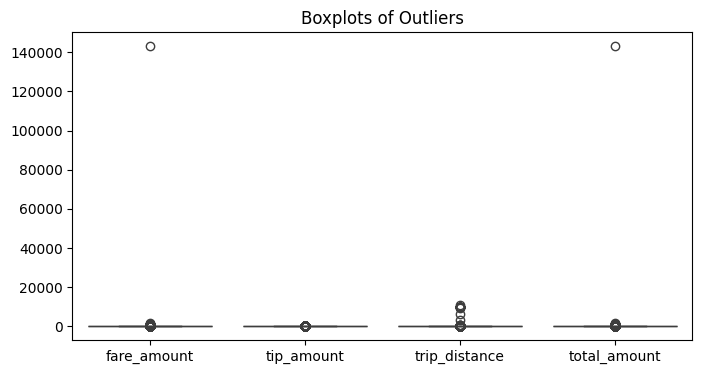

In [51]:
# Lets visualize the outliers using the boxplots

cols = ['fare_amount', 'tip_amount', 'trip_distance', 'total_amount']

plt.figure(figsize = (8,4))
sns.boxplot(data = df[cols])
plt.title('Boxplots of Outliers')
plt.show()

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [52]:
# remove passenger_count > 6

df = df[df['passenger_count']<=6]

**Continue with outlier handling**

Entries where trip_distance is nearly 0 and fare_amount is more than 300

In [53]:
df = df[~((df['trip_distance'] == 0) & (df['fare_amount'] > 300))]

In [54]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-08-31 23:56:01   2023-09-01 00:18:41              1.0   
1         2  2023-08-31 23:57:50   2023-09-01 00:27:33              2.0   
2         2  2023-08-31 23:59:18   2023-09-01 00:20:18              1.0   
3         2  2023-08-31 23:56:48   2023-09-01 00:18:33              5.0   
4         2  2023-08-31 23:48:03   2023-09-01 00:05:58              1.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           3.11         1.0           114           246             1   
1           5.57         1.0           100             7             1   
2          10.02         1.0           138           189             1   
3           4.40         1.0           186            24             1   
4           3.65         1.0            48           145             1   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0         21.2    1.0      0.5        0.00           0.0   
1         31.0    1.0      0.5        7.20           0.0   
2         40.1    6.0      0.5        9.87           0.0   
3         24.0    1.0      0.5        5.80           0.0   
4         19.8    1.0      0.5        2.20           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  
0                    1.0         26.20                   2.5         0.00  
1                    1.0         43.20                   2.5         0.00  
2                    1.0         59.22                   0.0         1.75  
3                    1.0         34.80                   2.5         0.00  
4                    1.0         27.00                   2.5         0.00

Entries where trip_distance and fare_amount are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)

In [55]:
df = df[~((df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID']))]


Entries where trip_distance is more than 250 miles.

In [56]:
df = df[df['trip_distance'] <= 250]

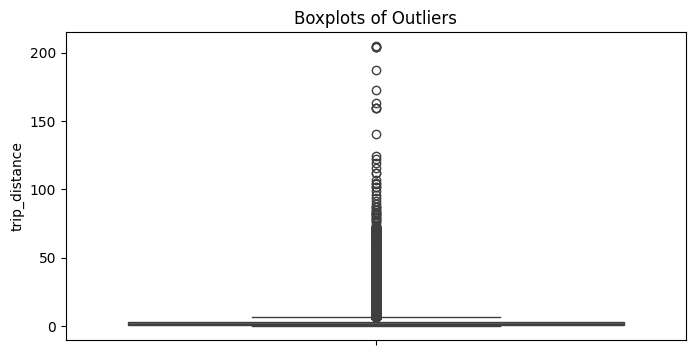

In [57]:
plt.figure(figsize = (8,4))
sns.boxplot(data = df['trip_distance'])
plt.title('Boxplots of Outliers')
plt.show()

In [58]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-08-31 23:56:01   2023-09-01 00:18:41              1.0   
1         2  2023-08-31 23:57:50   2023-09-01 00:27:33              2.0   
2         2  2023-08-31 23:59:18   2023-09-01 00:20:18              1.0   
3         2  2023-08-31 23:56:48   2023-09-01 00:18:33              5.0   
4         2  2023-08-31 23:48:03   2023-09-01 00:05:58              1.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           3.11         1.0           114           246             1   
1           5.57         1.0           100             7             1   
2          10.02         1.0           138           189             1   
3           4.40         1.0           186            24             1   
4           3.65         1.0            48           145             1   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0         21.2    1.0      0.5        0.00           0.0   
1         31.0    1.0      0.5        7.20           0.0   
2         40.1    6.0      0.5        9.87           0.0   
3         24.0    1.0      0.5        5.80           0.0   
4         19.8    1.0      0.5        2.20           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  
0                    1.0         26.20                   2.5         0.00  
1                    1.0         43.20                   2.5         0.00  
2                    1.0         59.22                   0.0         1.75  
3                    1.0         34.80                   2.5         0.00  
4                    1.0         27.00                   2.5         0.00

In [59]:
# Do any columns need standardising?
# The fare amount and the total amount column has such a high outliers
# So lets set the highest amount be 500

df = df[(df['fare_amount'] < 500) &
        (df['tip_amount'] < 500) &
        (df['total_amount'] < 500)]

In [60]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-08-31 23:56:01   2023-09-01 00:18:41              1.0   
1         2  2023-08-31 23:57:50   2023-09-01 00:27:33              2.0   
2         2  2023-08-31 23:59:18   2023-09-01 00:20:18              1.0   
3         2  2023-08-31 23:56:48   2023-09-01 00:18:33              5.0   
4         2  2023-08-31 23:48:03   2023-09-01 00:05:58              1.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           3.11         1.0           114           246             1   
1           5.57         1.0           100             7             1   
2          10.02         1.0           138           189             1   
3           4.40         1.0           186            24             1   
4           3.65         1.0            48           145             1   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0         21.2    1.0      0.5        0.00           0.0   
1         31.0    1.0      0.5        7.20           0.0   
2         40.1    6.0      0.5        9.87           0.0   
3         24.0    1.0      0.5        5.80           0.0   
4         19.8    1.0      0.5        2.20           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  
0                    1.0         26.20                   2.5         0.00  
1                    1.0         43.20                   2.5         0.00  
2                    1.0         59.22                   0.0         1.75  
3                    1.0         34.80                   2.5         0.00  
4                    1.0         27.00                   2.5         0.00

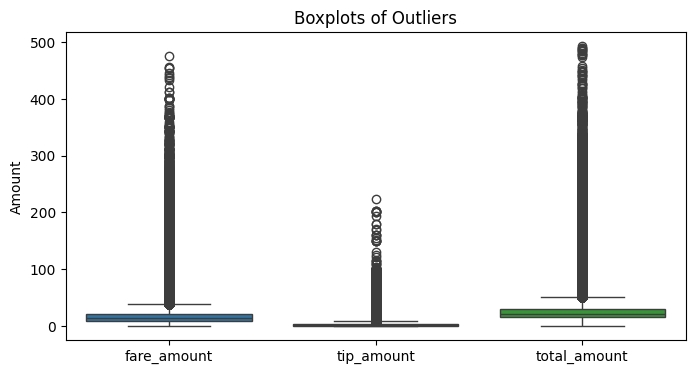

In [61]:

cols = ['fare_amount', 'tip_amount', 'total_amount']
plt.figure(figsize = (8,4))
sns.boxplot(data = df[cols])
plt.title('Boxplots of Outliers')
plt.ylabel('Amount')
plt.show()

In [62]:
df[cols].max()

fare_amount     475.00
tip_amount      223.08
total_amount    492.70
dtype: float64

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [63]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee']

In [64]:
df.shape

(2117121, 18)

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

In [65]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-08-31 23:56:01   2023-09-01 00:18:41              1.0   
1         2  2023-08-31 23:57:50   2023-09-01 00:27:33              2.0   
2         2  2023-08-31 23:59:18   2023-09-01 00:20:18              1.0   
3         2  2023-08-31 23:56:48   2023-09-01 00:18:33              5.0   
4         2  2023-08-31 23:48:03   2023-09-01 00:05:58              1.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           3.11         1.0           114           246             1   
1           5.57         1.0           100             7             1   
2          10.02         1.0           138           189             1   
3           4.40         1.0           186            24             1   
4           3.65         1.0            48           145             1   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0         21.2    1.0      0.5        0.00           0.0   
1         31.0    1.0      0.5        7.20           0.0   
2         40.1    6.0      0.5        9.87           0.0   
3         24.0    1.0      0.5        5.80           0.0   
4         19.8    1.0      0.5        2.20           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  
0                    1.0         26.20                   2.5         0.00  
1                    1.0         43.20                   2.5         0.00  
2                    1.0         59.22                   0.0         1.75  
3                    1.0         34.80                   2.5         0.00  
4                    1.0         27.00                   2.5         0.00

In [66]:
df['RatecodeID'].unique()

array([1., 2., 4., 5., 3., 6.])

In [67]:
df['RatecodeID'] = df['RatecodeID'].astype(int)

In [68]:
payment_type_map = {
    1: 'Credit card',
    2: 'Cash',
    3: 'No charge',
    4: 'Dispute',
    5: 'Unknown',
    6: 'Voided trip'
}


ratecode_map = {
    1: 'Standard rate',
    2: 'JFK',
    3: 'Newark',
    4: 'Nassau or Westchester',
    5: 'Negotiated fare',
    6: 'Group ride'
}

# Mapping the values of codes mentioned in the description intially
df['payment_type'] = df['payment_type'].map(payment_type_map)
df['RatecodeID'] = df['RatecodeID'].map(ratecode_map)

In [69]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-08-31 23:56:01   2023-09-01 00:18:41              1.0   
1         2  2023-08-31 23:57:50   2023-09-01 00:27:33              2.0   
2         2  2023-08-31 23:59:18   2023-09-01 00:20:18              1.0   
3         2  2023-08-31 23:56:48   2023-09-01 00:18:33              5.0   
4         2  2023-08-31 23:48:03   2023-09-01 00:05:58              1.0   

   trip_distance     RatecodeID  PULocationID  DOLocationID payment_type  \
0           3.11  Standard rate           114           246  Credit card   
1           5.57  Standard rate           100             7  Credit card   
2          10.02  Standard rate           138           189  Credit card   
3           4.40  Standard rate           186            24  Credit card   
4           3.65  Standard rate            48           145  Credit card   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0         21.2    1.0      0.5        0.00           0.0   
1         31.0    1.0      0.5        7.20           0.0   
2         40.1    6.0      0.5        9.87           0.0   
3         24.0    1.0      0.5        5.80           0.0   
4         19.8    1.0      0.5        2.20           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  
0                    1.0         26.20                   2.5         0.00  
1                    1.0         43.20                   2.5         0.00  
2                    1.0         59.22                   0.0         1.75  
3                    1.0         34.80                   2.5         0.00  
4                    1.0         27.00                   2.5         0.00

In [70]:
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

In [71]:
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-08-31 23:56:01   2023-09-01 00:18:41              1.0   
1         2  2023-08-31 23:57:50   2023-09-01 00:27:33              2.0   
2         2  2023-08-31 23:59:18   2023-09-01 00:20:18              1.0   
3         2  2023-08-31 23:56:48   2023-09-01 00:18:33              5.0   
4         2  2023-08-31 23:48:03   2023-09-01 00:05:58              1.0   

   trip_distance     RatecodeID  PULocationID  DOLocationID payment_type  \
0           3.11  Standard rate           114           246  Credit card   
1           5.57  Standard rate           100             7  Credit card   
2          10.02  Standard rate           138           189  Credit card   
3           4.40  Standard rate           186            24  Credit card   
4           3.65  Standard rate            48           145  Credit card   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0         21.2    1.0      0.5        0.00           0.0   
1         31.0    1.0      0.5        7.20           0.0   
2         40.1    6.0      0.5        9.87           0.0   
3         24.0    1.0      0.5        5.80           0.0   
4         19.8    1.0      0.5        2.20           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0         26.20                   2.5         0.00   
1                    1.0         43.20                   2.5         0.00   
2                    1.0         59.22                   0.0         1.75   
3                    1.0         34.80                   2.5         0.00   
4                    1.0         27.00                   2.5         0.00   

   pickup_hour  trip_duration  
0           23      22.666667  
1           23      29.716667  
2           23      21.000000  
3           23      21.750000  
4           23      17.916667

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

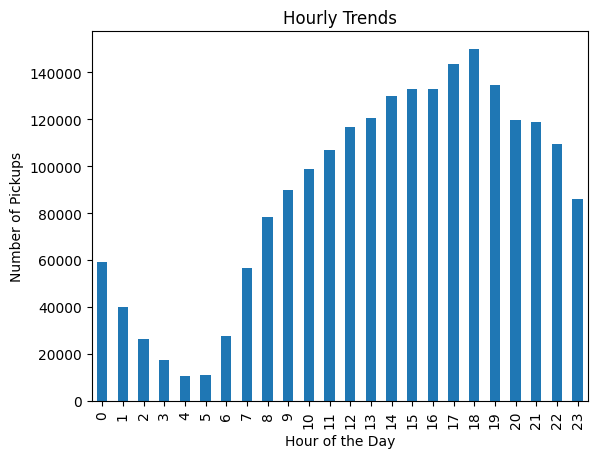

In [72]:
# Find and show the hourly trends in taxi pickups
df.groupby('pickup_hour').size().plot(kind = 'bar')
plt.ylabel('Number of Pickups')
plt.xlabel('Hour of the Day')
plt.title('Hourly Trends')
plt.show()

In [73]:
# Find and show the daily trends in taxi pickups (days of the week)

df['days_of_week'] = df['tpep_pickup_datetime'].dt.day_name()
pickup_counts = df['days_of_week'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
pickup_counts.plot(kind='bar')
plt.ylabel('Number of Pickups')
plt.xlabel('Day of the Week')
plt.title('Weekly Trends')
plt.show()

In [74]:
# Show the monthly trends in pickups
df['monthly_count'] = df['tpep_pickup_datetime'].dt.month_name()
df['monthly_count_num'] = df['tpep_pickup_datetime'].dt.month
df.groupby(['monthly_count_num','monthly_count']).size().plot(kind = 'barh')
plt.ylabel('Month')
plt.xlabel('Number of Pickups')
plt.title('Monthly Trends')
plt.show()

In [75]:
df.head(2)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-08-31 23:56:01   2023-09-01 00:18:41              1.0   
1         2  2023-08-31 23:57:50   2023-09-01 00:27:33              2.0   

   trip_distance     RatecodeID  PULocationID  DOLocationID payment_type  \
0           3.11  Standard rate           114           246  Credit card   
1           5.57  Standard rate           100             7  Credit card   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0         21.2    1.0      0.5         0.0           0.0   
1         31.0    1.0      0.5         7.2           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0          26.2                   2.5          0.0   
1                    1.0          43.2                   2.5          0.0   

   pickup_hour  trip_duration days_of_week monthly_count  monthly_count_num  
0           23      22.666667     Thursday        August                  8  
1           23      29.716667     Thursday        August                  8

In [76]:
df['monthly_count'].value_counts()

monthly_count
January      443564
May          168114
October      165532
March        163403
June         158247
April        157674
November     157392
December     156637
February     140183
July         138992
August       134275
September    133108
Name: count, dtype: int64

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [77]:
# Analyse the above parameters

financial_cols = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

for col in financial_cols:
    zero_count = (df[col] == 0).sum()
    negative_count = (df[col] < 0).sum()
    print(f"{col}: zero values = {zero_count}, negative values = {negative_count}")

fare_amount: zero values = 668, negative values = 0
tip_amount: zero values = 465065, negative values = 0
total_amount: zero values = 387, negative values = 0
trip_distance: zero values = 25445, negative values = 0


In [78]:
# From the above solution the tip amount which has zero values are high this is beacuse most probably people doesnt tip
# 556 zero values in fare amount which needs to be dropped if the distance and total amount is zero and keep if the payment type is no charge
# 313 zero values in total amount which needs to be investigated

df = df[~((df['fare_amount'] == 0) &
          (df['trip_distance'] == 0) &
          (df['total_amount'] == 0) &
          (~df['payment_type'].isin(['No charge', 'Voided trip'])))
     ]

In [79]:
for col in financial_cols:
    zero_count = (df[col] == 0).sum()
    negative_count = (df[col] < 0).sum()
    print(f"{col}: zero values = {zero_count}, negative values = {negative_count}")

fare_amount: zero values = 473, negative values = 0
tip_amount: zero values = 464870, negative values = 0
total_amount: zero values = 192, negative values = 0
trip_distance: zero values = 25250, negative values = 0


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

In [80]:
# Create a filtered copy where key columns have non-zero values
df_clean = df[
    (df['fare_amount'] > 0) &
    (df['total_amount'] > 0)
].copy()

In [81]:
df_clean.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-08-31 23:56:01   2023-09-01 00:18:41              1.0   
1         2  2023-08-31 23:57:50   2023-09-01 00:27:33              2.0   
2         2  2023-08-31 23:59:18   2023-09-01 00:20:18              1.0   
3         2  2023-08-31 23:56:48   2023-09-01 00:18:33              5.0   
4         2  2023-08-31 23:48:03   2023-09-01 00:05:58              1.0   

   trip_distance     RatecodeID  PULocationID  DOLocationID payment_type  \
0           3.11  Standard rate           114           246  Credit card   
1           5.57  Standard rate           100             7  Credit card   
2          10.02  Standard rate           138           189  Credit card   
3           4.40  Standard rate           186            24  Credit card   
4           3.65  Standard rate            48           145  Credit card   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0         21.2    1.0      0.5        0.00           0.0   
1         31.0    1.0      0.5        7.20           0.0   
2         40.1    6.0      0.5        9.87           0.0   
3         24.0    1.0      0.5        5.80           0.0   
4         19.8    1.0      0.5        2.20           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0         26.20                   2.5         0.00   
1                    1.0         43.20                   2.5         0.00   
2                    1.0         59.22                   0.0         1.75   
3                    1.0         34.80                   2.5         0.00   
4                    1.0         27.00                   2.5         0.00   

   pickup_hour  trip_duration days_of_week monthly_count  monthly_count_num  
0           23      22.666667     Thursday        August                  8  
1           23      29.716667     Thursday        August                  8  
2           23      21.000000     Thursday        August                  8  
3           23      21.750000     Thursday        August                  8  
4           23      17.916667     Thursday        August                  8

In [82]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2116453 entries, 0 to 2128996
Data columns (total 23 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             object        
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           object        
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amount           float64       
 16  congestion_surcharge   float64       
 17  Airport_fee            float64       
 18  pickup_hour            int3

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [83]:
# Create a df with non zero entries for the selected parameters.
df_clean = df_clean[
    ~((df_clean['trip_distance'] == 0) & (df_clean['PULocationID'] != df_clean['DOLocationID']))
]


In [84]:
df_clean.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-08-31 23:56:01   2023-09-01 00:18:41              1.0   
1         2  2023-08-31 23:57:50   2023-09-01 00:27:33              2.0   
2         2  2023-08-31 23:59:18   2023-09-01 00:20:18              1.0   
3         2  2023-08-31 23:56:48   2023-09-01 00:18:33              5.0   
4         2  2023-08-31 23:48:03   2023-09-01 00:05:58              1.0   

   trip_distance     RatecodeID  PULocationID  DOLocationID payment_type  \
0           3.11  Standard rate           114           246  Credit card   
1           5.57  Standard rate           100             7  Credit card   
2          10.02  Standard rate           138           189  Credit card   
3           4.40  Standard rate           186            24  Credit card   
4           3.65  Standard rate            48           145  Credit card   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0         21.2    1.0      0.5        0.00           0.0   
1         31.0    1.0      0.5        7.20           0.0   
2         40.1    6.0      0.5        9.87           0.0   
3         24.0    1.0      0.5        5.80           0.0   
4         19.8    1.0      0.5        2.20           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0         26.20                   2.5         0.00   
1                    1.0         43.20                   2.5         0.00   
2                    1.0         59.22                   0.0         1.75   
3                    1.0         34.80                   2.5         0.00   
4                    1.0         27.00                   2.5         0.00   

   pickup_hour  trip_duration days_of_week monthly_count  monthly_count_num  
0           23      22.666667     Thursday        August                  8  
1           23      29.716667     Thursday        August                  8  
2           23      21.000000     Thursday        August                  8  
3           23      21.750000     Thursday        August                  8  
4           23      17.916667     Thursday        August                  8

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [85]:
# Group data by month and analyse monthly revenue

df_clean.groupby(['monthly_count_num','monthly_count'])['total_amount'].sum().plot(kind = 'bar')
plt.ylabel('Revenue')
plt.xlabel('Month')
plt.title('Monthly Revenue')
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

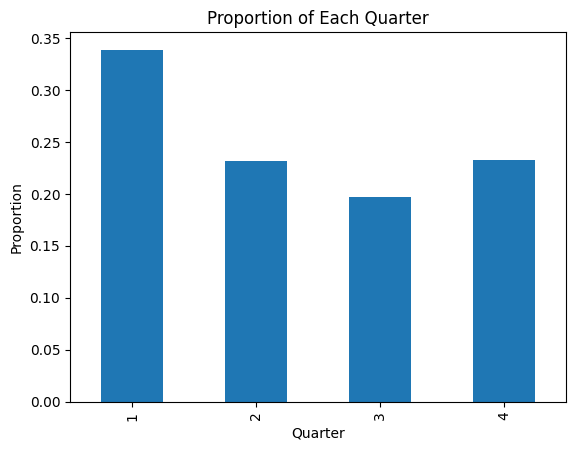

In [86]:
# Calculate proportion of each quarter
df['Quarter_year'] = df['tpep_pickup_datetime'].dt.quarter
Q_proportion = df.groupby('Quarter_year')['total_amount'].sum() / df['total_amount'].sum()
Q_proportion.plot(kind = 'bar')
plt.ylabel('Proportion')
plt.xlabel('Quarter')
plt.title('Proportion of Each Quarter')
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

In [87]:

df_filtered = df_clean[df_clean['trip_distance'] > 0]


df_filtered.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                       object
PULocationID                      int64
DOLocationID                      int64
payment_type                     object
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
Airport_fee                     float64
pickup_hour                       int32
trip_duration                   float64
days_of_week                     object
monthly_count                    object
monthly_count_num                 int32
dtype: object

In [88]:
# Scatter plot visualisation for Trip Distance vs Fare Amount

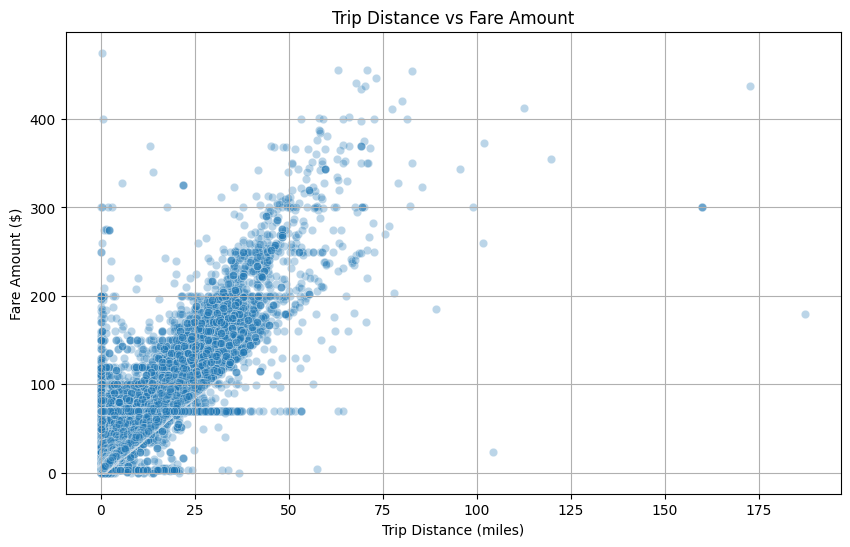

In [89]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x='trip_distance', y='fare_amount', alpha=0.3)
plt.title('Trip Distance vs Fare Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)

In [90]:
# Correlation value for Trip Distance and Fare Amount

In [91]:
correlation = df_filtered['trip_distance'].corr(df_filtered['fare_amount'])
print(f"Correlation between trip_distance and fare_amount: {correlation:.3f}")

Correlation between trip_distance and fare_amount: 0.947


This Correlation value indicates that there is strong linear relationship between Trip Distance and Fare Amount.

It would have been better but not perfect may be  due to surcharges  

In [92]:
# limit extreme values to improve readability
# From the scatter plot the extreme values in distance and the trip amount seems to be 400 and 150. Lets limit it


In [93]:
# Apply specified limits to remove extreme values

df_filtered = df_filtered[
    (df_filtered['trip_distance'] < 400) &
    (df_filtered['fare_amount'] < 150)
]

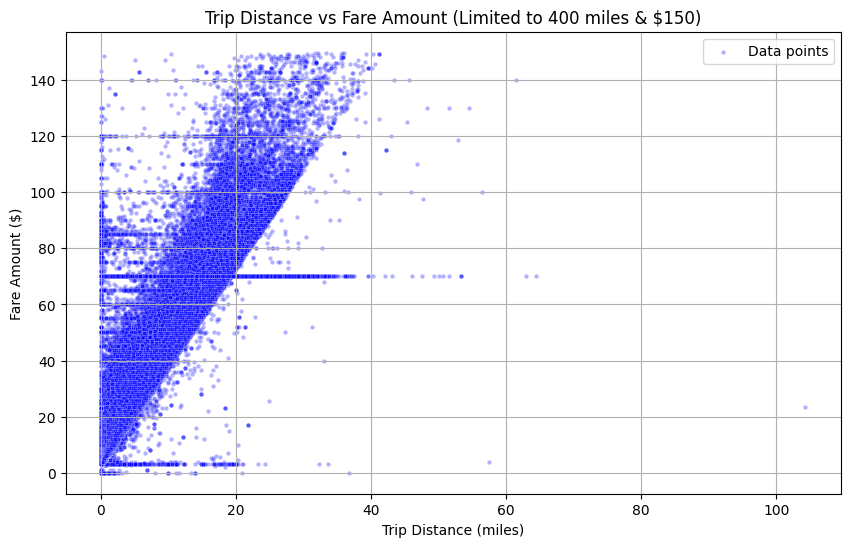

In [94]:
# Plot the scatter with regression line

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_filtered,
    x='trip_distance',
    y='fare_amount',
    alpha=0.3,
    s=10,
    color='blue',
    label='Data points'
)

plt.title('Trip Distance vs Fare Amount (Limited to 400 miles & $150)')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.show()

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

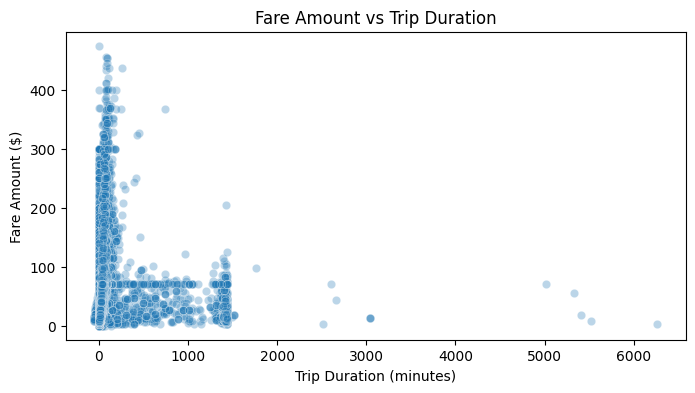

In [95]:
# Show relationship between fare and trip duration

plt.figure(figsize=(8,4))
sns.scatterplot(data=df_clean, x='trip_duration', y='fare_amount', alpha=0.3)
plt.title('Fare Amount vs Trip Duration')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount ($)')
plt.show()

In [96]:
# Correlation between trip Duration and Fare amount

correlation = df_clean['trip_duration'].corr(df_clean['fare_amount'])
print(f"Correlation between fare amount and trip duration: {correlation:.3f}")

Correlation between fare amount and trip duration: 0.258


A correlation of 0.258 between fare_amount and trip_duration indicates a weak to moderate positive linear relationship.

Fare must increase as the trip duration increases but here the relationship is not very strong.

And this as well makes sense because the fare depends on the distance a lot rather than time. Because some factors like traffic, weather conditions can delay the duration.

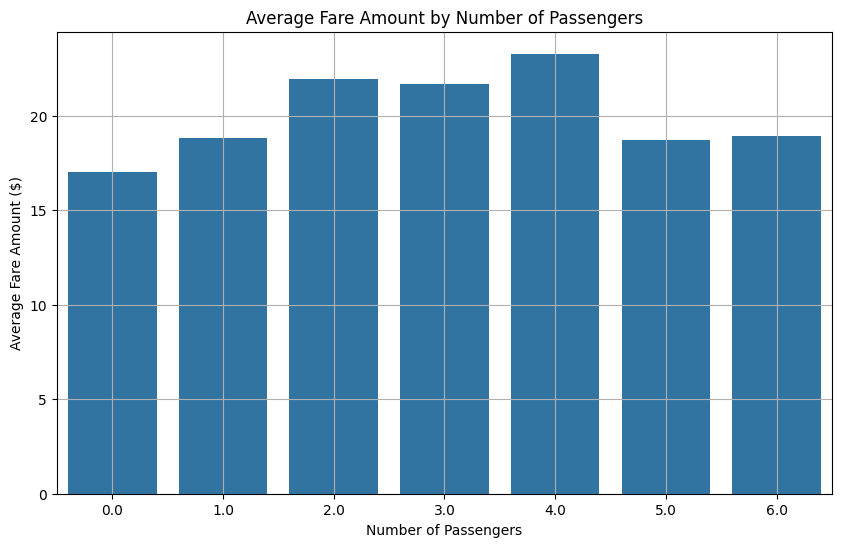

In [97]:
# Show relationship between fare and number of passengers

plt.figure(figsize=(10, 6))
sns.barplot(data=df_clean, x='passenger_count', y='fare_amount', ci=None)
plt.title('Average Fare Amount by Number of Passengers')
plt.xlabel('Number of Passengers')
plt.ylabel('Average Fare Amount ($)')
plt.grid(True)
plt.show()

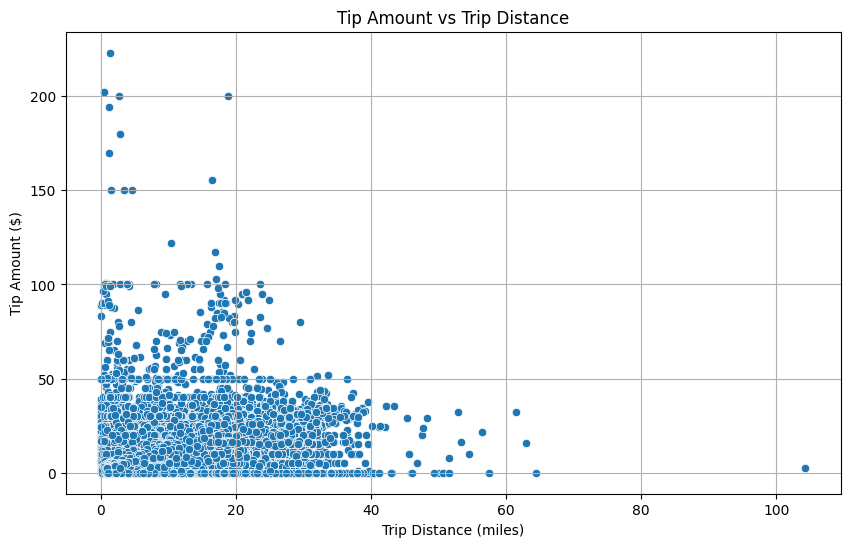

In [98]:
# Show relationship between tip and trip distance

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_filtered,
    x='trip_distance',
    y='tip_amount'
)
plt.title('Tip Amount vs Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')
plt.grid(True)
plt.show()

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

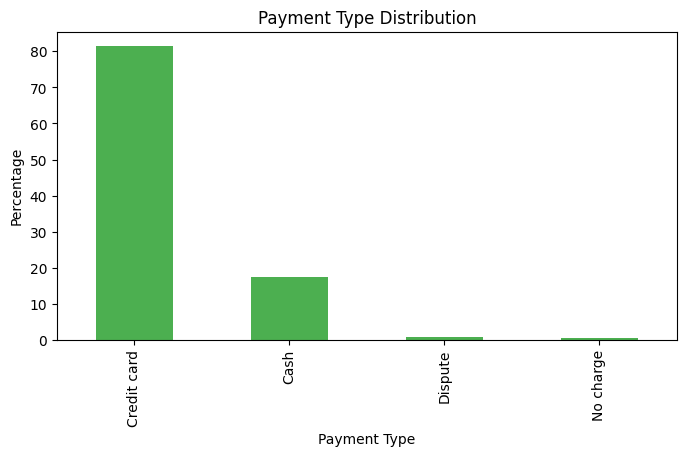

In [99]:
# Analyse the distribution of different payment types (payment_type).

payment_percentages = df_clean['payment_type'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 4))

payment_percentages.plot(kind='bar', color='#4CAF50')
plt.title('Payment Type Distribution')
plt.xlabel('Payment Type')
plt.ylabel('Percentage')
plt.show()

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [100]:
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [101]:
import geopandas as gpd


# Read the shapefile using geopandas

zones = gpd.read_file('/content/drive/MyDrive/Taxi/taxi_zones/taxi_zones.shp')
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

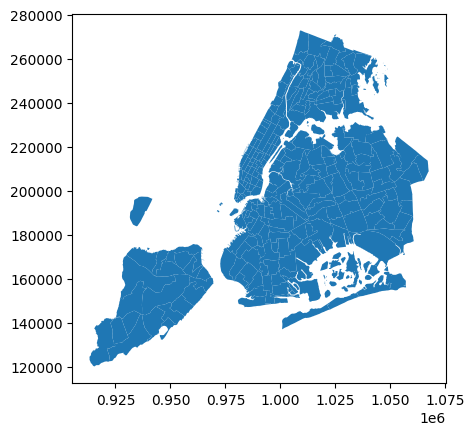

In [102]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



In [103]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2108592 entries, 0 to 2128996
Data columns (total 23 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             object        
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           object        
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amount           float64       
 16  congestion_surcharge   float64       
 17  Airport_fee            float64       
 18  pickup_hour            int3

**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [104]:
# Merge zones and trip records using locationID and PULocationID

# Merge pickup zone info

merged_df = df_clean.merge(
    zones[['LocationID', 'zone', 'borough']],
    left_on='PULocationID',
    right_on='LocationID',
    how='left'
).rename(columns={'zone': 'pickup_zone', 'borough': 'pickup_borough'})

# Merge drop zone info on the merged_df

merged_df = merged_df.merge(
    zones[['LocationID', 'zone', 'borough']],
    left_on='DOLocationID',
    right_on='LocationID',
    how='left',
    suffixes=('_pickup', '_drop')
).rename(columns={'zone': 'drop_zone', 'borough': 'drop_borough'})


In [105]:
merged_df.head(2)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-08-31 23:56:01   2023-09-01 00:18:41              1.0   
1         2  2023-08-31 23:57:50   2023-09-01 00:27:33              2.0   

   trip_distance     RatecodeID  PULocationID  DOLocationID payment_type  \
0           3.11  Standard rate           114           246  Credit card   
1           5.57  Standard rate           100             7  Credit card   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0         21.2    1.0      0.5         0.0           0.0   
1         31.0    1.0      0.5         7.2           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0          26.2                   2.5          0.0   
1                    1.0          43.2                   2.5          0.0   

   pickup_hour  trip_duration days_of_week monthly_count  monthly_count_num  \
0           23      22.666667     Thursday        August                  8   
1           23      29.716667     Thursday        August                  8   

   LocationID_pickup              pickup_zone pickup_borough  LocationID_drop  \
0              114.0  Greenwich Village South      Manhattan            246.0   
1              100.0         Garment District      Manhattan              7.0   

                   drop_zone drop_borough  
0  West Chelsea/Hudson Yards    Manhattan  
1                    Astoria       Queens

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [106]:
# Group data by location and calculate the number of trips
total_trips = merged_df.groupby('LocationID_pickup').size().reset_index(name='total_trips')
total_trips

LocationID_pickup  total_trips
0                  1.0          227
1                  2.0            2
2                  3.0            5
3                  4.0         2097
4                  6.0           36
5                  7.0          887
6                  8.0            6
7                  9.0            6
8                 10.0          602
9                 11.0            8
10                12.0          897
11                13.0        12012
12                14.0           51
13                15.0            1
14                16.0            6
15                17.0           82
16                18.0           12
17                19.0           22
18                20.0           10
19                21.0            9
20                22.0           17
21                23.0            8
22                24.0         5277
23                25.0          562
24                26.0           20
25                27.0            1
26                28.0          151
27                29.0           15
28                31.0            8
29                32.0            2
30                33.0          713
31                34.0           27
32                35.0           12
33                36.0           74
34                37.0           81
35                38.0           14
36                39.0           37
37                40.0          216
38                41.0         4327
39                42.0         1283
40                43.0        35651
41                44.0            5
42                45.0         2780
43                46.0            1
44                47.0           16
45                48.0        56543
46                49.0          119
47                50.0        12986
48                51.0            8
49                52.0          348
50                53.0           16
51                54.0           31
52                55.0            8
53                56.0          156
54                58.0            2
55                59.0            2
56                60.0           18
57                61.0           84
58                62.0           21
59                63.0           14
60                64.0            9
61                65.0         1106
62                66.0          502
63                67.0           10
64                68.0        54929
65                69.0           48
66                70.0         9543
67                71.0            6
68                72.0           15
69                73.0            5
70                74.0         3994
71                75.0        11978
72                76.0           65
73                77.0            5
74                78.0           10
75                79.0        50239
76                80.0          282
77                81.0            2
78                82.0          162
79                83.0           70
80                85.0           17
81                86.0           13
82                87.0        10567
83                88.0         5424
84                89.0           54
85                90.0        34125
86                91.0           11
87                92.0           44
88                93.0          552
89                94.0           12
90                95.0          130
91                96.0            5
92                97.0          521
93                98.0           10
94               100.0        34839
95               101.0            7
96               102.0           10
97               106.0           47
98               107.0        44811
99               108.0            6
100              109.0            2
101              111.0            2
102              112.0          253
103              113.0        28929
104              114.0        27851
105              115.0            1
106              116.0         1218
107              117.0            3
108              118.0            3
109              119.0           32
110      

In [107]:
merged_df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-08-31 23:56:01   2023-09-01 00:18:41              1.0   
1         2  2023-08-31 23:57:50   2023-09-01 00:27:33              2.0   
2         2  2023-08-31 23:59:18   2023-09-01 00:20:18              1.0   
3         2  2023-08-31 23:56:48   2023-09-01 00:18:33              5.0   
4         2  2023-08-31 23:48:03   2023-09-01 00:05:58              1.0   

   trip_distance     RatecodeID  PULocationID  DOLocationID payment_type  \
0           3.11  Standard rate           114           246  Credit card   
1           5.57  Standard rate           100             7  Credit card   
2          10.02  Standard rate           138           189  Credit card   
3           4.40  Standard rate           186            24  Credit card   
4           3.65  Standard rate            48           145  Credit card   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0         21.2    1.0      0.5        0.00           0.0   
1         31.0    1.0      0.5        7.20           0.0   
2         40.1    6.0      0.5        9.87           0.0   
3         24.0    1.0      0.5        5.80           0.0   
4         19.8    1.0      0.5        2.20           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0         26.20                   2.5         0.00   
1                    1.0         43.20                   2.5         0.00   
2                    1.0         59.22                   0.0         1.75   
3                    1.0         34.80                   2.5         0.00   
4                    1.0         27.00                   2.5         0.00   

   pickup_hour  trip_duration days_of_week monthly_count  monthly_count_num  \
0           23      22.666667     Thursday        August                  8   
1           23      29.716667     Thursday        August                  8   
2           23      21.000000     Thursday        August                  8   
3           23      21.750000     Thursday        August                  8   
4           23      17.916667     Thursday        August                  8   

   LocationID_pickup                   pickup_zone pickup_borough  \
0              114.0       Greenwich Village South      Manhattan   
1              100.0              Garment District      Manhattan   
2              138.0             LaGuardia Airport         Queens   
3              186.0  Penn Station/Madison Sq West      Manhattan   
4               48.0                  Clinton East      Manhattan   

   LocationID_drop                       drop_zone drop_borough  
0            246.0       West Chelsea/Hudson Yards    Manhattan  
1              7.0                         Astoria       Queens  
2            189.0                Prospect Heights     Brooklyn  
3             24.0                    Bloomingdale    Manhattan  
4            145.0  Long Island City/Hunters Point       Queens

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [108]:
# Merge trip counts back to the zones GeoDataFrame

zones = zones.merge(total_trips, left_on='LocationID', right_on='LocationID_pickup', how='left')
zones.head()


OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   LocationID_pickup  total_trips  
0                1.0        227.0  
1                2.0          2.0  
2                3.0          5.0  
3                4.0       2097.0  
4                NaN          NaN

In [109]:
zones['total_trips'] = zones['total_trips'].fillna(0)
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   LocationID_pickup  total_trips  
0                1.0        227.0  
1                2.0          2.0  
2                3.0          5.0  
3                4.0       2097.0  
4                NaN          0.0

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

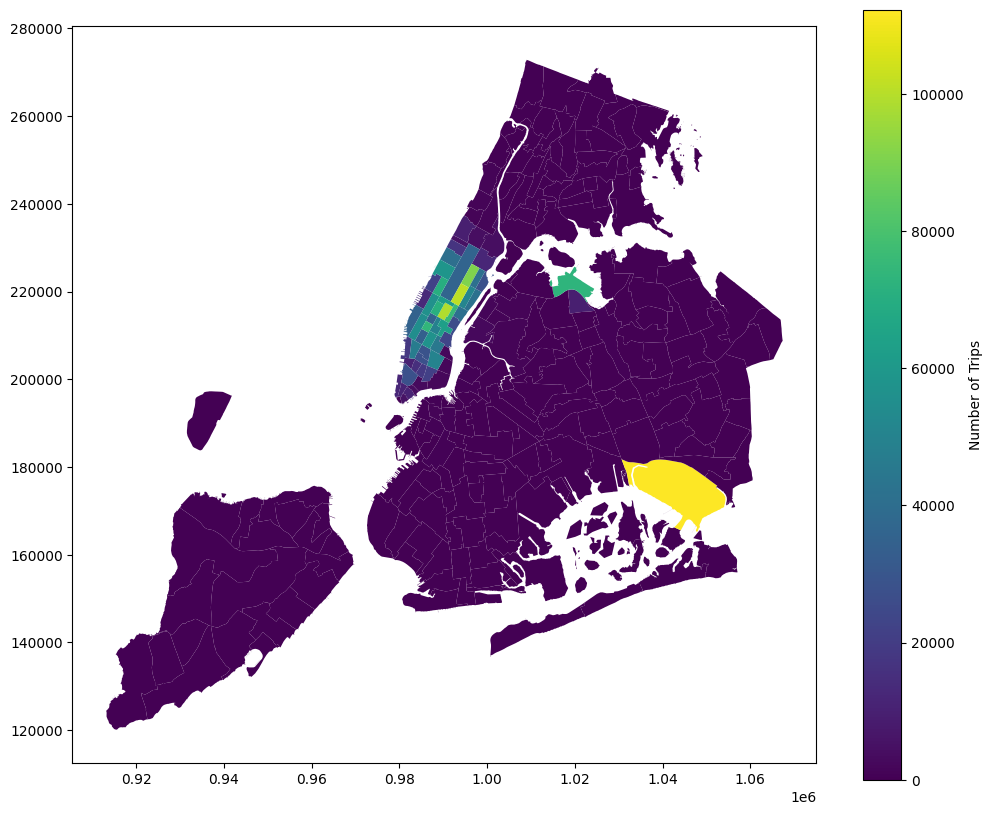

In [110]:
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

zones.plot(
    column='total_trips',
    ax=ax,
    legend=True,
    legend_kwds={
        'label': "Number of Trips",
        'orientation': "vertical"
    }
)
plt.show()

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

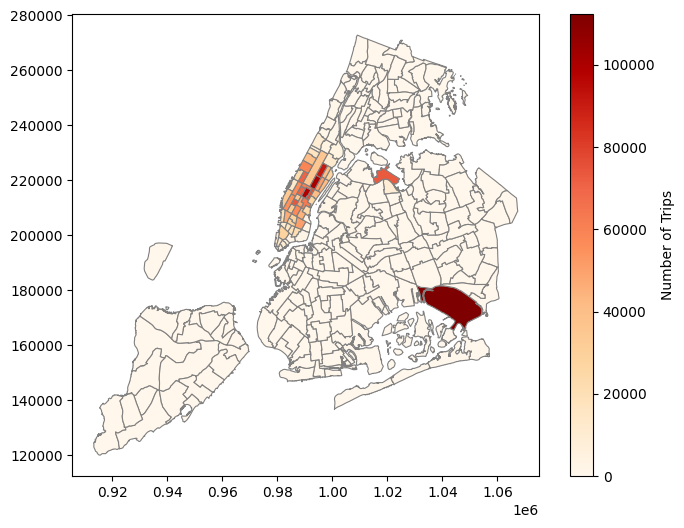

In [111]:
# Define figure and axis

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# Plot the map and display it

zones.plot(
    column='total_trips',
    cmap='OrRd',
    linewidth=0.8,
    edgecolor='gray',
    ax=ax,
    legend=True,
    legend_kwds={'label': "Number of Trips", 'orientation': "vertical"}
)
plt.show()

In [112]:
# can you try displaying the zones DF sorted by the number of trips?

zones.sort_values(by='total_trips', ascending=False, inplace=True)
zones.head()


OBJECTID  Shape_Leng  Shape_Area                   zone  LocationID  \
131       132    0.245479    0.002038            JFK Airport         132   
236       237    0.042213    0.000096  Upper East Side South         237   
160       161    0.035804    0.000072         Midtown Center         161   
235       236    0.044252    0.000103  Upper East Side North         236   
161       162    0.035270    0.000048           Midtown East         162   

       borough                                           geometry  \
131     Queens  MULTIPOLYGON (((1032791.001 181085.006, 103283...   
236  Manhattan  POLYGON ((993633.442 216961.016, 993507.232 21...   
160  Manhattan  POLYGON ((991081.026 214453.698, 990952.644 21...   
235  Manhattan  POLYGON ((995940.048 221122.92, 995812.322 220...   
161  Manhattan  POLYGON ((992224.354 214415.293, 992096.999 21...   

     LocationID_pickup  total_trips  
131              132.0     112328.0  
236              237.0     100988.0  
160              161.0      99118.0  
235              236.0      90790.0  
161              162.0      75778.0

In [113]:
[zones[['LocationID','zone']].head()]

[     LocationID                   zone
 131         132            JFK Airport
 236         237  Upper East Side South
 160         161         Midtown Center
 235         236  Upper East Side North
 161         162           Midtown East]

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


### My Findings from the General Analysis:
#### 1. **Busiest Hours is 14:00 - 19:00** which seems to be the peak hours for the taxi rides. This is because of the end time for the schools, colleges, offices, etc.
#### 2. When we consider the **Busiest Days of the Week**, Every days of the week has very similar trends. But when we look further we can consider **Tuesday, Wednesday and Thursday** are the busiest days compared to other days. Monday is often a "catch-up" or slow start. Friday tends to be lighter where many people takes off or leaves early. Many hybrid workers come to the office on these three days, leading to more taxi rides. Schools and universities often have core classes and full-day schedules midweek, resulting in more travel and rides for students and parents.
#### 3. When we come to **Months, January** has a huge variation compared to other months of the year. This is beacuse many people travel for the New Year Celebrations and they travel back to airports. After the New Year holidays, people resume work, school, and routines — which causes a spike in commuting. Due to the weather and snow covered roads and tunnels people take taxis for safer rides.
#### 4. As per Revenue, **January has the highest revenue** as January month has the highest number of rides.
#### 5. Trends in the Quarters also the **first quarter has the trends**. This can be the impact of January month.
#### 6. When we look after the fare how it depends on the trip distance. It seems to be very linear **as distance increases the fare also increases** respectively. The **Correlation value of 0.947** indicates that there is strong linear relationship between Trip Distance and Fare Amount.
#### 7. **Trip Duration Vs Fare** has a poor **correlation of 0.258** indicating a weak to moderate positive linear relationship. This makes sense because the fare depends on the distance a lot rather than time. Because some factors like traffic, weather conditions can delay the duration.
#### 8. Average Fare Amount  vs No of Passengers has no much difference in the analysis. But when the **Number of passengers is 2-4** then the average fare is high compared to other number of passengers.
#### 9. The **Tip amount** also has impact on the **Trip distance** because this also has a **very small linear relationship**. But 70% of the people has travelled without tip.
#### 10. When we consider the top 5 Busiest Zones, **JFK Airport at first**, then followed by **Upper East Side South, Midtown Center, Upper East Side North, and Midtown East**.

#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [114]:
merged_df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'Airport_fee', 'pickup_hour', 'trip_duration',
       'days_of_week', 'monthly_count', 'monthly_count_num',
       'LocationID_pickup', 'pickup_zone', 'pickup_borough', 'LocationID_drop',
       'drop_zone', 'drop_borough'],
      dtype='object')

In [115]:
# Find routes which have the slowest speeds at different times of the day

route_summary = merged_df.groupby(
    ['pickup_zone', 'drop_zone', 'pickup_hour']
).agg({
    'trip_distance': 'mean',
    'trip_duration': 'mean'  # in minutes
}).reset_index()


In [116]:
route_summary['avg_speed_mph'] = route_summary['trip_distance'] / (route_summary['trip_duration'] / 60)

slow_routes = route_summary.sort_values(by='avg_speed_mph').dropna()
slow_routes = slow_routes[slow_routes['avg_speed_mph'] > 0]  # Remove zero or negative speeds
slow_routes.head(10)

pickup_zone                          drop_zone  \
94658            Two Bridges/Seward Park        Downtown Brooklyn/MetroTech   
82798            Queensbridge/Ravenswood            Queensbridge/Ravenswood   
83277   Saint Michaels Cemetery/Woodside   Saint Michaels Cemetery/Woodside   
56444                Lincoln Square East                Lincoln Square East   
111922                         Woodhaven                          Woodhaven   
83274   Saint Michaels Cemetery/Woodside   Saint Michaels Cemetery/Woodside   
29848                   Garment District                            Astoria   
5416                     Carroll Gardens        Downtown Brooklyn/MetroTech   
35782            Greenwich Village North  University Heights/Morris Heights   
82877                    Randalls Island                    Randalls Island   

        pickup_hour  trip_distance  trip_duration  avg_speed_mph  
94658            13       0.490000    5522.433333       0.005324  
82798            14       0.004233      18.451227       0.013765  
83277            10       0.000286       1.038571       0.016506  
56444             5       0.560000    1413.550000       0.023770  
111922            1       0.020000      45.750000       0.026230  
83274             7       0.000476       0.805556       0.035468  
29848             8       0.220000     334.433333       0.039470  
5416             21       1.120000    1434.433333       0.046848  
35782            22       0.280000     349.233333       0.048105  
82877            16       0.010000      12.266667       0.048913

In [118]:
#See slowest routes during evening peak hours (4–7 PM)
evening_bottlenecks = slow_routes[slow_routes['pickup_hour'].isin([16, 17, 18, 19])]
evening_bottlenecks.head(10)

pickup_zone                       drop_zone  pickup_hour  \
82877           Randalls Island                 Randalls Island           16   
87853                 Sunnyside  Long Island City/Hunters Point           18   
112016                 Woodside                 Jackson Heights           17   
82800   Queensbridge/Ravenswood         Queensbridge/Ravenswood           16   
805                     Astoria                         Astoria           17   
82801   Queensbridge/Ravenswood         Queensbridge/Ravenswood           17   
84679                      SoHo                     Cobble Hill           18   
4287                Boerum Hill                     Boerum Hill           16   
45383                   Jamaica                         Jamaica           18   
96799       UN/Turtle Bay South                        Steinway           18   

        trip_distance  trip_duration  avg_speed_mph  
82877        0.010000      12.266667       0.048913  
87853        1.563333    1810.761111       0.051801  
112016       0.795000     713.450000       0.066858  
82800        0.014872      10.034509       0.088924  
805          0.580000     364.100000       0.095578  
82801        0.010571       5.800635       0.109348  
84679        3.170000    1430.933333       0.132920  
4287         0.005000       1.808333       0.165899  
45383        0.010000       3.133333       0.191489  
96799        4.980000    1435.683333       0.208124

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

In [119]:
# Visualise the number of trips per hour and find the busiest hour

hourly_trips = merged_df.groupby('pickup_hour').size().reset_index(name='trip_count')

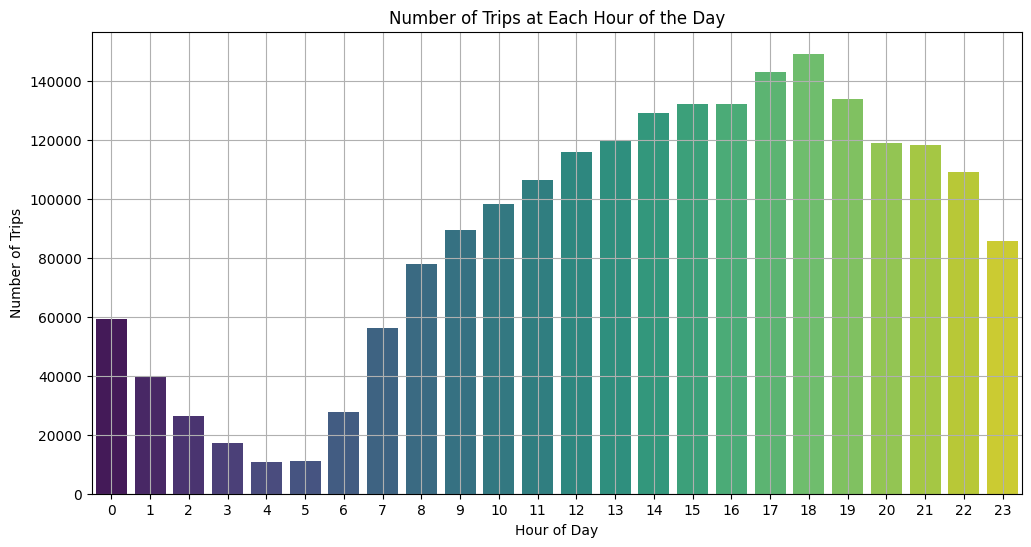

In [120]:
plt.figure(figsize=(12, 6))
sns.barplot(data=hourly_trips, x='pickup_hour', y='trip_count', palette='viridis')
plt.title('Number of Trips at Each Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.xticks(range(0, 24))  # Ensure all hours are visible
plt.show()

In [121]:
# Busiest Hour and No.of Trips in that Hour

busiest_hour = hourly_trips.loc[hourly_trips['trip_count'].idxmax()]
print(f"Busiest Hour: {busiest_hour['pickup_hour']} with {busiest_hour['trip_count']} trips.")

Busiest Hour: 18 with 149344 trips.


**Busiest Hour: 18 with 149344 trips.**


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [122]:
# Scale up the number of trips

hourly_sample = merged_df.groupby('pickup_hour').size().reset_index(name='sample_trip_count')

# Fill in the value of your sampling fraction and use that to scale up the numbers

sampling_ratio = 0.05
hourly_sample['estimated_trip_count'] = hourly_sample['sample_trip_count'] / sampling_ratio

# Top 5 Busiest hours and their trips

top5_hours = hourly_sample.sort_values(by='estimated_trip_count', ascending=False).head(5)
print(top5_hours)




    pickup_hour  sample_trip_count  estimated_trip_count
18           18             149344             2986880.0
17           17             142986             2859720.0
19           19             133976             2679520.0
16           16             132344             2646880.0
15           15             132334             2646680.0


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [124]:
# Create a new column day type that contains data either weekend or weekday

merged_df['day_type'] = merged_df['days_of_week'].apply(
    lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')



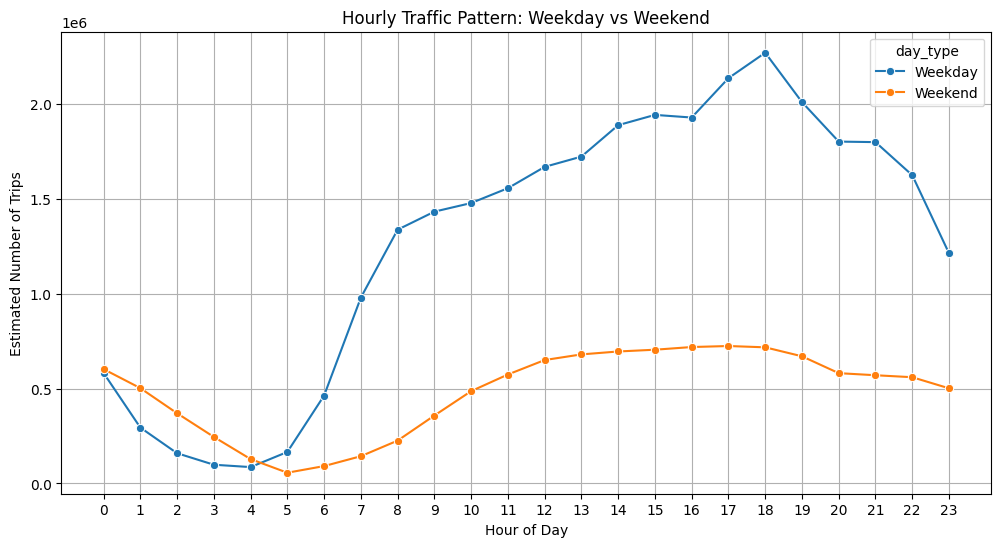

In [125]:
# groupby pickup hour and day type and then visualise it

hourly_daytype = merged_df.groupby(['pickup_hour', 'day_type']).size().reset_index(name='sample_trip_count')

sampling_ratio = 0.05
hourly_daytype['estimated_trip_count'] = hourly_daytype['sample_trip_count'] / sampling_ratio


plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_daytype, x='pickup_hour', y='estimated_trip_count', hue='day_type', marker='o')
plt.title('Hourly Traffic Pattern: Weekday vs Weekend')
plt.xlabel('Hour of Day')
plt.ylabel('Estimated Number of Trips')
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**From the above patterns we can infer that on Week days the busiest hours lies between 16:00 - 19:00 and the quiet hours is between 01:00 - 06:00. And for the weekends there is a gradual growth in pick hours is between 10:00 - 20:00 and the quiet hours is between 03:00 - 08:00.**

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

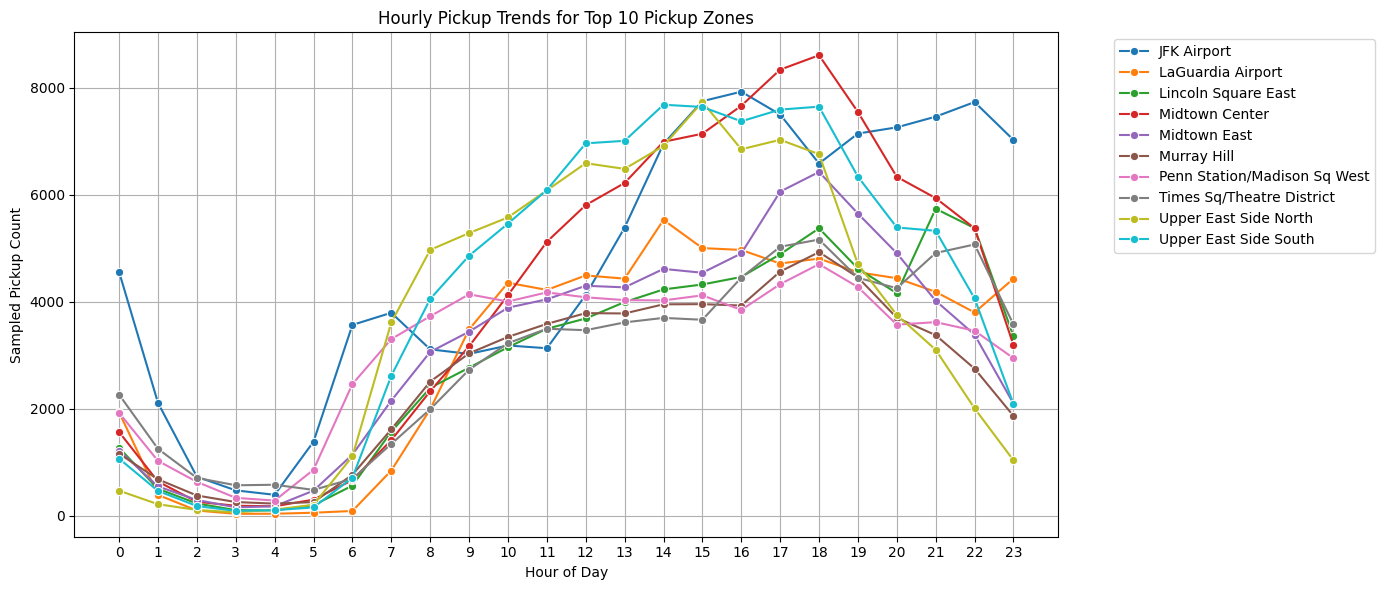

In [126]:
# Find top 10 pickup
# Group by pickup zone and hour
pickup_group = merged_df.groupby(['pickup_zone', 'pickup_hour']).size().reset_index(name='sample_pickup_count')

# Aggregate total pickups per zone (across all hours)
total_pickup = pickup_group.groupby('pickup_zone')['sample_pickup_count'].sum().reset_index()

# Get top 10 zones
top10_pickup_zones = total_pickup.sort_values(by='sample_pickup_count', ascending=False).head(10)['pickup_zone'].tolist()

pickup_trends = pickup_group[pickup_group['pickup_zone'].isin(top10_pickup_zones)]

# plot pick up trends

plt.figure(figsize=(14, 6))
sns.lineplot(data=pickup_trends, x='pickup_hour', y='sample_pickup_count', hue='pickup_zone', marker='o')
plt.title('Hourly Pickup Trends for Top 10 Pickup Zones')
plt.xlabel('Hour of Day')
plt.ylabel('Sampled Pickup Count')
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


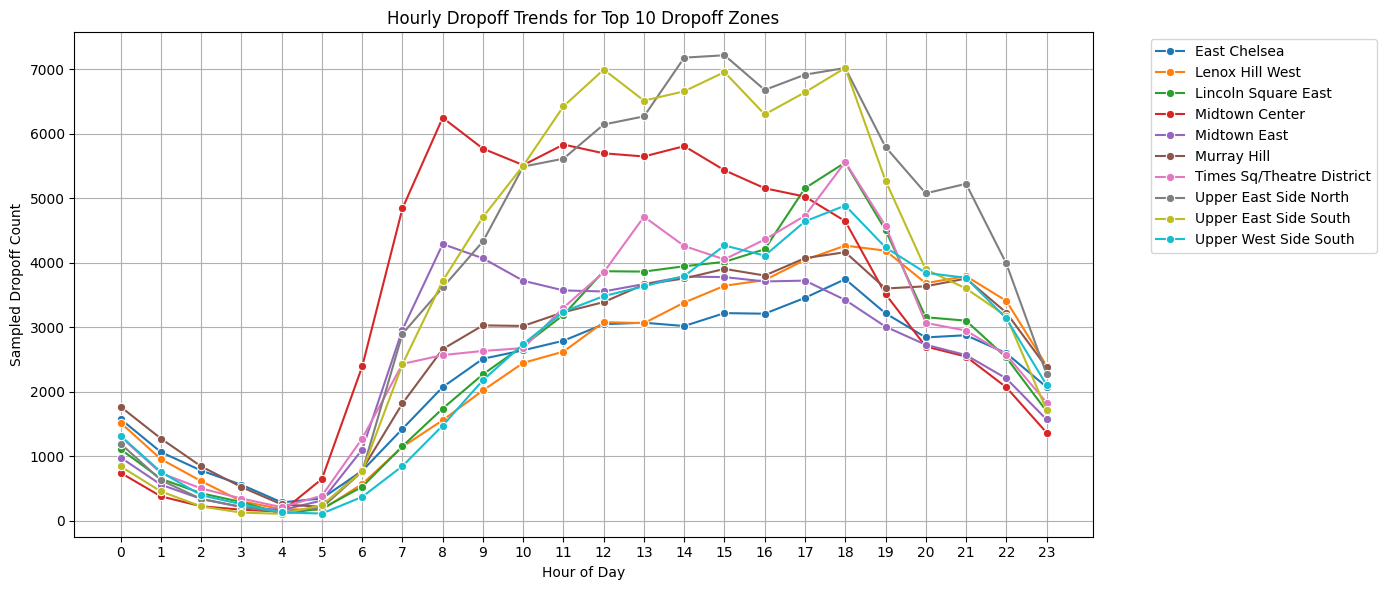

In [127]:
# Find top 10 drop
# Group by drop zone and hour
dropoff_group = merged_df.groupby(['drop_zone', 'pickup_hour']).size().reset_index(name='sample_dropoff_count')

# Aggregate total dropoffs per zone
total_dropoff = dropoff_group.groupby('drop_zone')['sample_dropoff_count'].sum().reset_index()

# Get top 10 dropoff zones
top10_dropoff_zones = total_dropoff.sort_values(by='sample_dropoff_count', ascending=False).head(10)['drop_zone'].tolist()

# Filter for those top zones
dropoff_trends = dropoff_group[dropoff_group['drop_zone'].isin(top10_dropoff_zones)]

# plot drop trends

plt.figure(figsize=(14, 6))
sns.lineplot(data=dropoff_trends, x='pickup_hour', y='sample_dropoff_count', hue='drop_zone', marker='o')
plt.title('Hourly Dropoff Trends for Top 10 Dropoff Zones')
plt.xlabel('Hour of Day')
plt.ylabel('Sampled Dropoff Count')
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [128]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

# Aggregate pickups by pickup_zone
pickup_counts = merged_df.groupby('pickup_zone').size().reset_index(name='pickup_count')

# Aggregate dropoffs by drop_zone
dropoff_counts = merged_df.groupby('drop_zone').size().reset_index(name='dropoff_count')

# Merge pickups and dropoffs on zone name
zone_counts = pd.merge(
    pickup_counts, dropoff_counts,
    left_on='pickup_zone', right_on='drop_zone',
    how='outer'
).fillna(0)

# For clarity, rename columns
zone_counts.rename(columns={'pickup_zone': 'zone'}, inplace=True)

# Calculate pickup/dropoff ratio safely
zone_counts['pickup_dropoff_ratio'] = zone_counts.apply(
    lambda row: row['pickup_count'] / row['dropoff_count'] if row['dropoff_count'] > 0 else float('inf'),
    axis=1
)

# Sort for highest ratios (top 10)
top_10 = zone_counts.sort_values(by='pickup_dropoff_ratio', ascending=False).head(10)

# Sort for lowest ratios (bottom 10)
bottom_10 = zone_counts.sort_values(by='pickup_dropoff_ratio').head(10)

print("Top 10 zones with highest pickup/dropoff ratio:")
print(top_10[['zone', 'pickup_count', 'dropoff_count', 'pickup_dropoff_ratio']])

print("\nBottom 10 zones with lowest pickup/dropoff ratio:")
print(bottom_10[['zone', 'pickup_count', 'dropoff_count', 'pickup_dropoff_ratio']])


Top 10 zones with highest pickup/dropoff ratio:
                             zone  pickup_count  dropoff_count  \
193                 Rikers Island           2.0            0.0   
66                  East Elmhurst        9543.0         1106.0   
121                   JFK Airport      112328.0        23855.0   
131             LaGuardia Airport       72906.0        25246.0   
180  Penn Station/Madison Sq West       73893.0        46558.0   
40                   Central Park       35651.0        25805.0   
106       Greenwich Village South       27851.0        20239.0   
243                  West Village       46695.0        35124.0   
155                  Midtown East       75778.0        60028.0   
154                Midtown Center       99118.0        82537.0   

     pickup_dropoff_ratio  
193                   inf  
66               8.628391  
121              4.708782  
131              2.887824  
180              1.587117  
40               1.381554  
106              1.376106  
2

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [129]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

# Define night hours: 11 PM to 5 AM (23, 0, 1, 2, 3, 4, 5)
night_hours = [23, 0, 1, 2, 3, 4, 5]

# Filter for night pickups based on pickup_hour
night_pickups = merged_df[merged_df['pickup_hour'].isin(night_hours)]

# Get top 10 pickup zones during night
top_10_night_pickups = (
    night_pickups.groupby('pickup_zone')
    .size()
    .reset_index(name='night_pickup_count')
    .sort_values(by='night_pickup_count', ascending=False)
    .head(10)
)

# Create dropoff_hour from tpep_dropoff_datetime
merged_df['dropoff_hour'] = pd.to_datetime(merged_df['tpep_dropoff_datetime']).dt.hour

# Filter for night dropoffs based on dropoff_hour
night_dropoffs = merged_df[merged_df['dropoff_hour'].isin(night_hours)]

# Get top 10 dropoff zones during night
top_10_night_dropoffs = (
    night_dropoffs.groupby('drop_zone')
    .size()
    .reset_index(name='night_dropoff_count')
    .sort_values(by='night_dropoff_count', ascending=False)
    .head(10)
)

print("Top 10 Pickup Zones during night hours (11 PM to 5 AM):")
print(top_10_night_pickups)

print("\nTop 10 Dropoff Zones during night hours (11 PM to 5 AM):")
print(top_10_night_dropoffs)


Top 10 Pickup Zones during night hours (11 PM to 5 AM):
                      pickup_zone  night_pickup_count
64                   East Village               18298
99                    JFK Airport               16673
207                  West Village               14358
36                   Clinton East               12125
118               Lower East Side               11161
88        Greenwich Village South               10122
189     Times Sq/Theatre District                9429
150  Penn Station/Madison Sq West                8004
132                 Midtown South                7099
108             LaGuardia Airport                6983

Top 10 Dropoff Zones during night hours (11 PM to 5 AM):
                     drop_zone  night_dropoff_count
75                East Village                10274
45                Clinton East                 8694
161                Murray Hill                 7748
64                East Chelsea                 7144
99                    Gramercy  

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [130]:
# Filter for night hours (11 PM to 5 AM)

# Define night and day hours
night_hours = [23, 0, 1, 2, 3, 4, 5]
day_hours = [h for h in range(24) if h not in night_hours]

# Ensure pickup_hour is integer
merged_df['pickup_hour'] = merged_df['pickup_hour'].astype(int)

# Calculate total revenue for night hours
night_revenue = merged_df[merged_df['pickup_hour'].isin(night_hours)]['total_amount'].sum()

# Calculate total revenue for day hours
day_revenue = merged_df[merged_df['pickup_hour'].isin(day_hours)]['total_amount'].sum()

# Calculate total revenue
total_revenue = night_revenue + day_revenue

# Revenue share percentages
night_share = (night_revenue / total_revenue) * 100
day_share = (day_revenue / total_revenue) * 100

# Print results
print(f"Nighttime Revenue Share (11 PM - 5 AM): {night_share:.2f}%")
print(f"Daytime Revenue Share (6 AM - 10 PM): {day_share:.2f}%")


Nighttime Revenue Share (11 PM - 5 AM): 12.17%
Daytime Revenue Share (6 AM - 10 PM): 87.83%


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [131]:
# Analyse the fare per mile per passenger for different passenger counts

# Filter out invalid data: trip_distance <= 0 or passenger_count <= 0
valid_df = merged_df[(merged_df['trip_distance'] > 0) & (merged_df['passenger_count'] > 0)]

# Compute fare per mile per passenger
valid_df['fare_per_mile_per_passenger'] = valid_df['fare_amount'] / (valid_df['trip_distance'] * valid_df['passenger_count'])

# Group by passenger count and compute average fare per mile per passenger
result = (
    valid_df.groupby('passenger_count')['fare_per_mile_per_passenger']
    .mean()
    .reset_index()
    .sort_values(by='passenger_count')
)

# Rename columns for clarity
result.columns = ['passenger_count', 'avg_fare_per_mile_per_passenger']

# Display the result
print("Average Fare per Mile per Passenger by Passenger Count:")
print(result)



Average Fare per Mile per Passenger by Passenger Count:
   passenger_count  avg_fare_per_mile_per_passenger
0              1.0                        10.807070
1              2.0                         6.344462
2              3.0                         3.759235
3              4.0                         4.262974
4              5.0                         1.684842
5              6.0                         1.340705


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

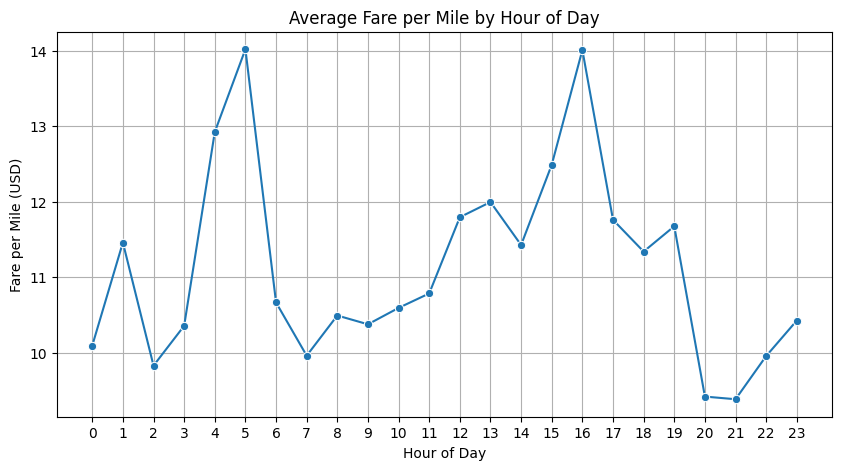

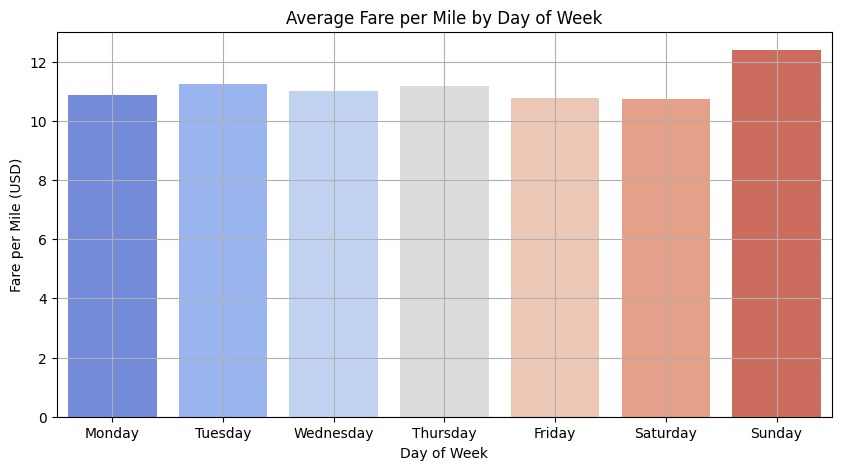

In [132]:
# Compare the average fare per mile for different days and for different times of the day

# Filter invalid data
valid_df = merged_df[merged_df['trip_distance'] > 0]

# Calculate fare per mile
valid_df['fare_per_mile'] = valid_df['fare_amount'] / valid_df['trip_distance']

# Average fare per mile by hour of day
fare_by_hour = (
    valid_df.groupby('pickup_hour')['fare_per_mile']
    .mean()
    .reset_index()
    .sort_values(by='pickup_hour')
)

# Average fare per mile by day of week
fare_by_day = (
    valid_df.groupby('days_of_week')['fare_per_mile']
    .mean()
    .reset_index()
)

# sort days in correct weekday order
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
fare_by_day['days_of_week'] = pd.Categorical(fare_by_day['days_of_week'], categories=weekday_order, ordered=True)
fare_by_day = fare_by_day.sort_values('days_of_week')

# Plot by hour
plt.figure(figsize=(10, 5))
sns.lineplot(data=fare_by_hour, x='pickup_hour', y='fare_per_mile', marker='o')
plt.title('Average Fare per Mile by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Fare per Mile (USD)')
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()

# Plot by day of week
plt.figure(figsize=(10, 5))
sns.barplot(data=fare_by_day, x='days_of_week', y='fare_per_mile', palette='coolwarm')
plt.title('Average Fare per Mile by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Fare per Mile (USD)')
plt.grid(True)
plt.show()


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

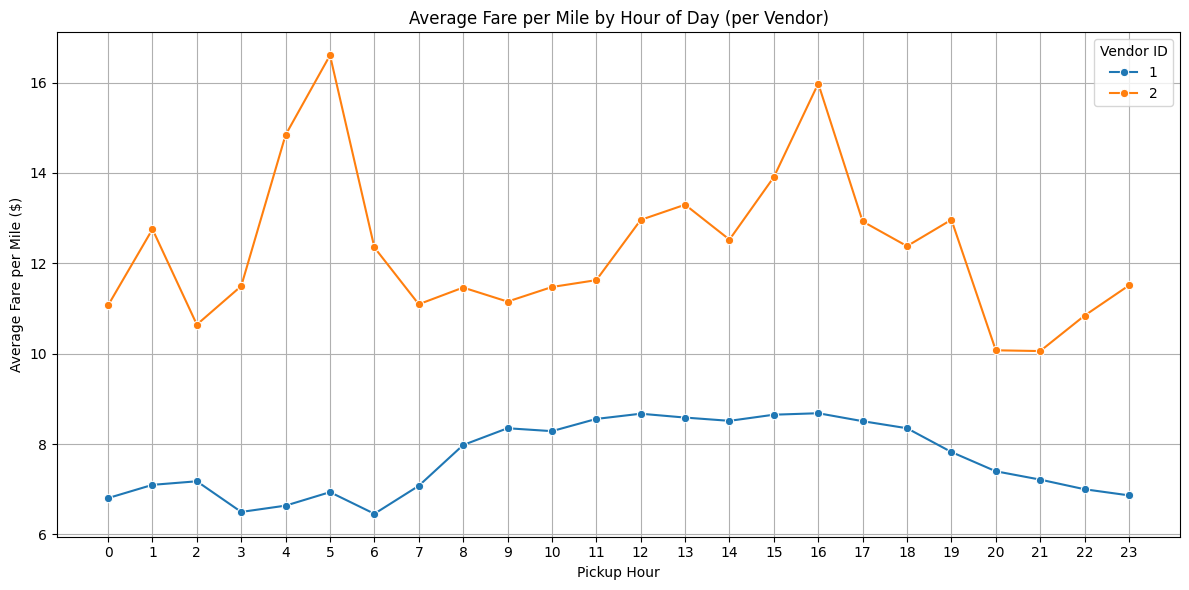

In [133]:
# Compare fare per mile for different vendors

# Filter for valid trips
valid_df = merged_df[
    (merged_df['trip_distance'] > 0) &
    (merged_df['fare_amount'] > 0)
].copy()

# Compute fare per mile
valid_df['fare_per_mile'] = valid_df['fare_amount'] / valid_df['trip_distance']

# Group by Vendor and Hour
fare_by_vendor_hour = (
    valid_df.groupby(['VendorID', 'pickup_hour'])['fare_per_mile']
    .mean()
    .reset_index()
    .sort_values(by=['VendorID', 'pickup_hour'])
)

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=fare_by_vendor_hour,
    x='pickup_hour',
    y='fare_per_mile',
    hue='VendorID',
    marker='o',
    palette='tab10'
)

plt.title('Average Fare per Mile by Hour of Day (per Vendor)')
plt.xlabel('Pickup Hour')
plt.ylabel('Average Fare per Mile ($)')
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend(title='Vendor ID', loc='upper right')
plt.tight_layout()
plt.show()


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


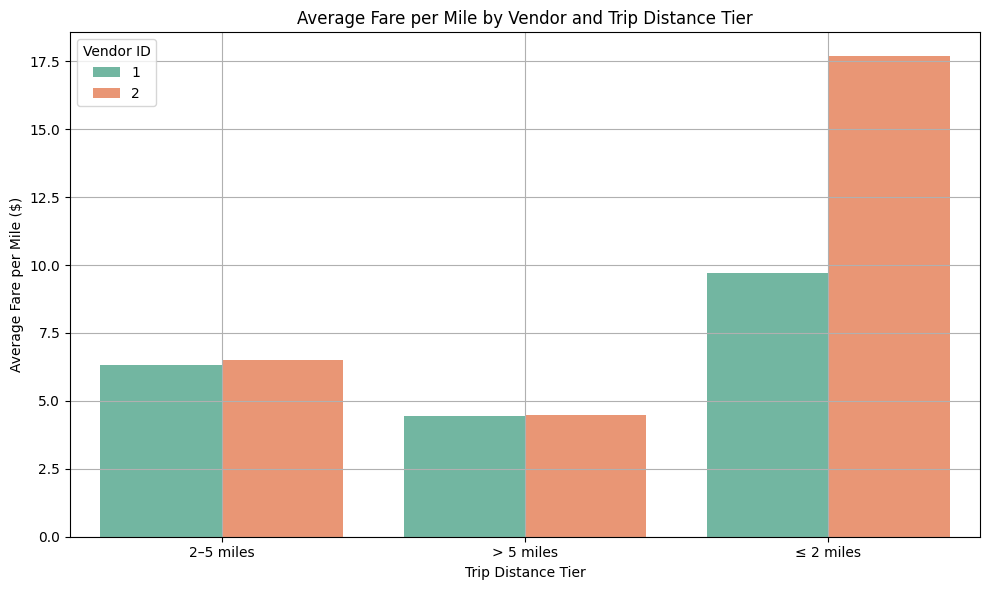

In [134]:
# Defining distance tiers

# Filter valid entries
valid_df = merged_df[
    (merged_df['trip_distance'] > 0) &
    (merged_df['fare_amount'] > 0)
].copy()

# Compute fare per mile
valid_df['fare_per_mile'] = valid_df['fare_amount'] / valid_df['trip_distance']

# Define distance tiers
def categorize_distance(dist):
    if dist <= 2:
        return '≤ 2 miles'
    elif dist <= 5:
        return '2–5 miles'
    else:
        return '> 5 miles'

valid_df['distance_tier'] = valid_df['trip_distance'].apply(categorize_distance)

# Group by Vendor and Distance Tier
tiered_fare = (
    valid_df.groupby(['VendorID', 'distance_tier'])['fare_per_mile']
    .mean()
    .reset_index()
)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=tiered_fare,
    x='distance_tier',
    y='fare_per_mile',
    hue='VendorID',
    palette='Set2'
)

plt.title('Average Fare per Mile by Vendor and Trip Distance Tier')
plt.xlabel('Trip Distance Tier')
plt.ylabel('Average Fare per Mile ($)')
plt.grid(True)
plt.legend(title='Vendor ID')
plt.tight_layout()
plt.show()


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [135]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

# Filter valid rows (to avoid divide-by-zero or NaNs)
valid_df = merged_df[
    (merged_df['fare_amount'] > 0) &
    (merged_df['tip_amount'] >= 0) &
    (merged_df['trip_distance'] > 0)
].copy()

# Compute tip percentage
valid_df['tip_percent'] = (valid_df['tip_amount'] / valid_df['fare_amount']) * 100

# Create trip distance bins
def distance_bin(d):
    if d <= 1:
        return 'Short (≤1 mi)'
    elif d <= 5:
        return 'Medium (1–5 mi)'
    else:
        return 'Long (>5 mi)'

valid_df['distance_bin'] = valid_df['trip_distance'].apply(distance_bin)



In [137]:
# Tip % by Trip Distance

tip_by_distance = (
    valid_df.groupby('distance_bin')['tip_percent']
    .mean()
    .reset_index()
    .sort_values(by='distance_bin')
)
print(tip_by_distance)

      distance_bin  tip_percent
0     Long (>5 mi)    17.722520
1  Medium (1–5 mi)    20.194858
2    Short (≤1 mi)    24.282855


In [139]:
# Tip % by Passenger count

tip_by_passenger = (
    valid_df[valid_df['passenger_count'] > 0]                      # <-- Filter here
    .groupby('passenger_count')['tip_percent']
    .mean()
    .reset_index()
    .sort_values(by='passenger_count')
)
print(tip_by_passenger)

   passenger_count  tip_percent
0              1.0    21.071308
1              2.0    19.786850
2              3.0    19.054051
3              4.0    17.575150
4              5.0    20.534968
5              6.0    20.460466


In [140]:
#  Tip % by pickup hour

tip_by_hour = (
    valid_df.groupby('pickup_hour')['tip_percent']
    .mean()
    .reset_index()
    .sort_values(by='pickup_hour')
)
print(tip_by_hour)

    pickup_hour  tip_percent
0             0    20.465588
1             1    20.660865
2             2    20.658461
3             3    20.962273
4             4    18.381875
5             5    18.002345
6             6    18.881959
7             7    19.832251
8             8    20.246995
9             9    19.981322
10           10    19.476354
11           11    19.421773
12           12    19.334846
13           13    19.241989
14           14    19.139303
15           15    19.134867
16           16    21.066088
17           17    24.220405
18           18    22.330509
19           19    22.222394
20           20    21.529118
21           21    21.531401
22           22    21.296675
23           23    20.660702


Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [141]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

# Filter valid trips
tip_df = merged_df[
    (merged_df['fare_amount'] > 0) &
    (merged_df['tip_amount'] >= 0) &
    (merged_df['trip_distance'] > 0)
].copy()

# Calculate tip percentage
tip_df['tip_percent'] = (tip_df['tip_amount'] / tip_df['fare_amount']) * 100

# Classify tipping behavior
def classify_tip(pct):
    if pct < 10:
        return 'Low Tip (<10%)'
    elif pct >= 25:
        return 'High Tip (≥25%)'
    else:
        return 'Mid Range'

tip_df['tip_category'] = tip_df['tip_percent'].apply(classify_tip)

# Focus on low and high tip groups
compare_df = tip_df[tip_df['tip_category'].isin(['Low Tip (<10%)', 'High Tip (≥25%)'])]

# Compare feature-wise
summary = compare_df.groupby('tip_category')[[
    'trip_distance', 'fare_amount', 'passenger_count', 'trip_duration'
]].mean().reset_index()

print(summary)


      tip_category  trip_distance  fare_amount  passenger_count  trip_duration
0  High Tip (≥25%)       2.293856    14.311668         1.347539      12.598820
1   Low Tip (<10%)       3.842593    21.178865         1.418241      19.380117


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

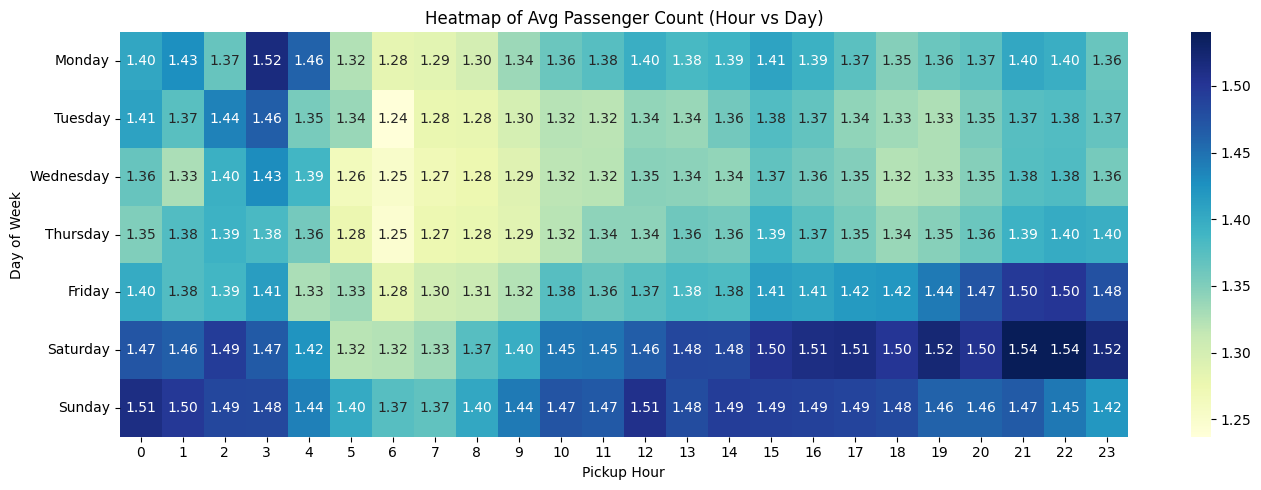

In [142]:
filtered_df = merged_df[merged_df['passenger_count'] > 0]

# See how passenger count varies across hours and days

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Pivot table for heatmap

heatmap_data = (
    filtered_df.groupby(['days_of_week', 'pickup_hour'])['passenger_count']
    .mean()
    .reset_index()
    .pivot(index='days_of_week', columns='pickup_hour', values='passenger_count')
    .reindex(day_order)
)

# Plot
plt.figure(figsize=(14, 5))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".2f")
plt.title('Heatmap of Avg Passenger Count (Hour vs Day)')
plt.xlabel('Pickup Hour')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()




**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [143]:
# How does passenger count vary across zones

# Filter out invalid passenger counts
zone_df = merged_df[merged_df['passenger_count'] > 0].copy()

# Group by pickup zone
zone_passenger_avg = (
    zone_df.groupby('pickup_zone')['passenger_count']
    .mean()
    .reset_index()
    .rename(columns={'passenger_count': 'avg_passenger_count'})
)

# Sort zones
top_zones = zone_passenger_avg.sort_values(by='avg_passenger_count', ascending=False)

print("Top 10 Zones by Average Passenger Count:")
print(top_zones.head(10))

print("\nBottom 10 Zones by Average Passenger Count:")
print(top_zones.tail(10))

Top 10 Zones by Average Passenger Count:
                 pickup_zone  avg_passenger_count
167      Ocean Parkway South             3.333333
97                 Gravesend             2.166667
99       Green-Wood Cemetery             2.000000
52              Country Club             2.000000
42        Claremont/Bathgate             1.916667
121          Jamaica Estates             1.909091
29        Brooklyn Navy Yard             1.884615
184                 Red Hook             1.847716
139          Manhattan Beach             1.818182
2    Arrochar/Fort Wadsworth             1.805556

Bottom 10 Zones by Average Passenger Count:
                   pickup_zone  avg_passenger_count
161     New Dorp/Midland Beach                  1.0
145            Mariners Harbor                  1.0
173            Pelham Bay Park                  1.0
176              Port Richmond                  1.0
199             Sheepshead Bay                  1.0
203   South Beach/Dongan Hills                  1.0


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [144]:
# How often is each surcharge applied?

surcharge_cols = ['extra', 'mta_tax', 'improvement_surcharge', 'congestion_surcharge', 'Airport_fee', 'tolls_amount']

# Calculate frequency of surcharge applied
surcharge_freq = {}

for col in surcharge_cols:
    count_applied = (merged_df[col] > 0).sum()
    total_trips = len(merged_df)
    surcharge_freq[col] = {
        'count': count_applied,
        'percentage': (count_applied / total_trips) * 100
    }

import pandas as pd
surcharge_freq_df = pd.DataFrame.from_dict(surcharge_freq, orient='index').reset_index()
surcharge_freq_df.columns = ['Surcharge', 'Count Applied', 'Percentage (%)']

print(surcharge_freq_df)


               Surcharge  Count Applied  Percentage (%)
0                  extra        1313718       62.284453
1                mta_tax        2091156       99.143429
2  improvement_surcharge        2109117       99.994974
3   congestion_surcharge        1960791       92.962717
4            Airport_fee         147950        7.014431
5           tolls_amount         167117        7.923155


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies


###**Prioritize High Demand Zones & Hours:**
Focus routing and dispatching resources primarily during the peak hours of **14:00–19:00** and on the busiest days (**Tuesday to Thursday**). Deploy more taxis in high-demand zones such as **East Elmhurst, JFK, LaGuardia, East Village**, and nightlife/entertainment districts during night hours.

###**Dynamic Dispatch Based on Real-Time Demand:**
Use real-time demand data to dynamically **re-route taxis to zones with surging demand**. For example, increase dispatch to East Village, Times Square, and airports at night when pickups are high, and adjust to residential zones for drop-offs.

###**Reduce Idle Time by Zone Balancing:**
Avoid oversupply in **low-demand zones**(*Bay Terrace, Laurelton, Sunset Park East*). Use historical pickup/dropoff ratios to balance supply and reduce taxi idle time and cruising, minimizing operational inefficiencies and fuel waste.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

###**Zone-Based Fleet Composition:**
*Deploy more medium and large taxis in zones with higher average passenger counts* (e.g., Ocean Parkway South, Gravesend) to cater to group travel and shared rides. *Smaller taxis should be prioritized in zones with average passenger count close to 1* (e.g., New Dorp, Mariners Harbor).

###**Seasonal & Monthly Adjustments:**
*Increase taxi availability in January and Q1* to handle the New Year travel surge and adverse weather conditions that push people towards taxis for safety.

###**Night vs. Day Allocation:**
Since **87.83%** of revenue is from daytime, maintain higher cab concentration during the day, especially in business districts and schools/colleges. At night, *concentrate cabs in nightlife hubs and airports* to capture residual demand efficiently.

###**Strategic Airport Placement:**
Maintain a dedicated fleet or rapid response team at *JFK and LaGuardia* to manage high airport demand, especially during peak flight hours.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

###**Time-Based Surge Pricing:**
Increase fare rates between **14:00–19:00** when demand peaks, rather than early morning fare spikes (4–5 AM) which have lower volume, to maximize revenue.

###**Vendor-Specific Pricing Insights:**
Analyze and possibly adjust *Vendor 1’s pricing model to be more competitive in short trips*, as Vendor 2 charges higher fares per mile for trips under 2 miles. Consider aligning short-trip fares to avoid losing market share.

###**Incentivize Group Travel:**
*Offer fare discounts or package deals for group rides in zones with high average passenger counts*, encouraging more shared rides and higher overall revenue.

###**Dynamic Tipping Encouragement:**
*Promote better tipping during low-tip periods* (early mornings) through service quality improvements or incentives, since tips are significant in evening trips.

###**Distance-Fare Correlation Use:**
Since fare correlates strongly with trip distance, implement minimum fares that reflect operational costs on short trips to avoid losses.